In [2]:
library(ggplot2)
library(dplyr)
library(tidyverse)
library(SPRING)

In [3]:
# ggplot theme #
my_theme0 <- theme(panel.background = element_rect(fill = "transparent", 
                                                colour = NA), plot.background = element_rect(colour = 'NA', 
                                                                                             fill = 'transparent'),panel.grid.major=element_line(color=NA),
                axis.line=element_line(size=1.2,color="black"),
                axis.ticks=element_line(color="black"),
                axis.text=element_text(color="black",size=26),
                axis.title=element_text(color="black",size=30),
                panel.grid.minor = element_line(colour = NA),
                legend.text=element_text(size=17),legend.key=element_rect(fill="white"),
                legend.title=element_text(size=18,face="bold"),
                axis.text.x=element_text(angle=60,size=26,vjust=0.5),
                panel.border = element_rect(colour = "black", fill=NA, size=1),
                legend.position = "none")

my_theme1 <- theme_bw() + 
  theme(panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        text = element_text(size = 16),
        axis.title.x = element_text(size=18, color="black"), 
        axis.title.y = element_text(size=18, color="black"), 
        axis.text.x = element_text(angle = 0, hjust = 1, color="black"), 
        panel.grid.minor.x = element_line(colour = "grey", size=0.2, linetype = 'dashed'), 
        panel.grid.major.x = element_line(colour = "grey", size=0.2),
        panel.grid.minor.y = element_line(colour = "grey", size = 0.2, linetype = 'dashed'),
        panel.grid.major.y = element_line(colour = "grey", size=0.2),
        legend.position = "bottom", 
        legend.text=element_text(size=10), 
        legend.key.size = unit(1,"line"), 
        plot.margin=unit(c(1,1,1,1),"cm")
       ) 

### - read in percentage and metadata files

In [4]:
kaiju_relpct_file <- "kaiju__MERGED_min_2000_pct.tsv"
metaeuk_relpct_file <- "metaeuk__MERGED_min_2000_pct.tsv"
def_relpct_file <- "DEF__MERGED_min_2000_pct.tsv"
metadata_file <- "ESPAE_metadata_CTD.tsv"
contig2type_file <- "contig2type.tsv"

kaiju_relpct_df <- read.table(kaiju_relpct_file, header = T, sep = "\t", as.is = T, stringsAsFactors = F, row.names = 1)
metaeuk_relpct_df <- read.table(metaeuk_relpct_file, header = T, sep = "\t", as.is = T, stringsAsFactors = F, row.names = 1)
def_relpct_df <- read.table(def_relpct_file, header = T, sep = "\t", as.is = T, stringsAsFactors = F, row.names = 1)
metadata_df <- read.table(metadata_file, header=T, sep="\t", as.is=T, stringsAsFactors = F, row.names = 1)
contig2type_df <- read.table(contig2type_file, header = T, sep = "\t", as.is=T, stringsAsFactors = F, row.names=1)
head(kaiju_relpct_df, 2)
head(metadata_df, 2)
colnames(metadata_df)

,Eukaryote,EukaryoticVirus,Prokaryote,ProkaryoticVirus,Unclassified,UnclassifiedVirus,TotalCnt
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
ESPAEMG01_S37_L003,22.04348,0.8152525,52.23363,3.561932,20.64605,0.6996461,38832631
ESPAEMG02_S38_L003,19.94248,0.7910602,54.45902,3.322740,20.80867,0.6760222,34578152


,Library_Type,Filter_Fraction,Month_Day,Month,Day,Time,Temperature,Depth,Salinity,Chlorophyll,Transmission,Total_Reads
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
ESPAEMG01_S37_L003,MG,AE,Mar_18,3,18,AM,16.14,9.740,33.447,0.40,94.1,81077508
ESPAEMG02_S38_L003,MG,AE,Mar_19,3,19,AM,16.25,8.625,33.447,0.82,95.1,69411938


[1] "Library_Type"    "Filter_Fraction" "Month_Day"       "Month"          
 [5] "Day"             "Time"            "Temperature"     "Depth"          
 [9] "Salinity"        "Chlorophyll"     "Transmission"    "Total_Reads"

In [5]:
head(contig2type_df, 2)
nrow(contig2type_df)

,DEF_Class,Kaiju_Class,MetaEuk_Class
,<chr>,<chr>,<chr>
ESP_1,Prokaryote,Prokaryote,Prokaryote
ESP_2,Prokaryote,Prokaryote,Prokaryote


[1] 331357

In [8]:
DEF_cnt <- contig2type_df %>%
    count(DEF_Class)
Kaiju_cnt <- contig2type_df %>%
    count(Kaiju_Class)
MetaEuk_cnt <- contig2type_df %>%
    count(MetaEuk_Class)
type_cnt_df <- data.frame(row.names = c("Eukaryote", "EukaryoteVirus", "Prokaryote", "ProkaryoteVirus", "Unclassified", "UnclassifiedVirus"))
type_cnt_df$DeepMicrobeFinder = c(DEF_cnt$n, 0, 0)
type_cnt_df$Kaiju = c(Kaiju_cnt$n)
type_cnt_df$MetaEuk = c(MetaEuk_cnt$n)
type_cnt_df.long <- type_cnt_df %>% 
    rownames_to_column(var = "SeqType") %>% 
    gather(key = Predictor, value = Count, -SeqType) %>% 
    group_by(Predictor) %>% 
    mutate(Percentage = Count / sum(Count) * 100) %>%
    mutate(SeqType = factor(SeqType, levels=c("Prokaryote", "ProkaryoteVirus", "Eukaryote", "EukaryoteVirus", "Unclassified", "UnclassifiedVirus"))) 

head(type_cnt_df.long, 5)

SeqType,Predictor,Count,Percentage
<fct>,<chr>,<dbl>,<dbl>
Eukaryote,DeepMicrobeFinder,97658,29.47214
EukaryoteVirus,DeepMicrobeFinder,13603,4.10524
Prokaryote,DeepMicrobeFinder,169290,51.08991
ProkaryoteVirus,DeepMicrobeFinder,50806,15.33271
Unclassified,DeepMicrobeFinder,0,0.00000


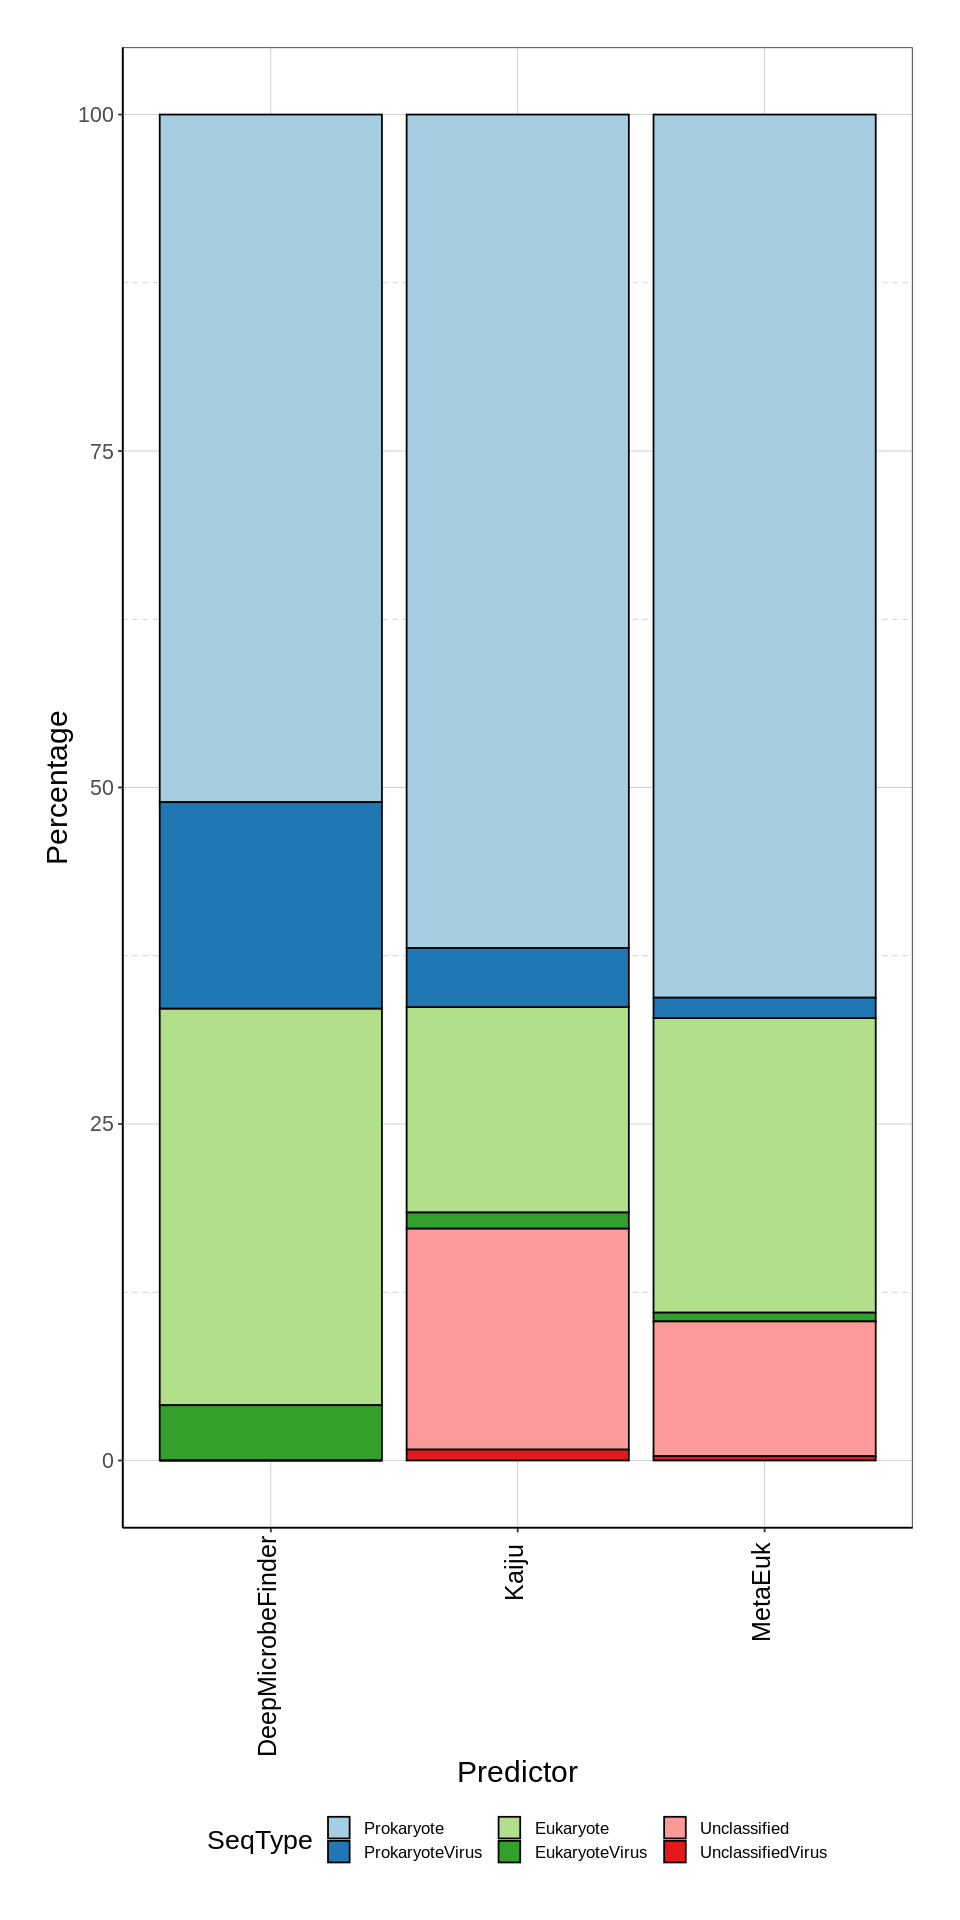

In [12]:
options(repr.plot.width=8, repr.plot.height=16)

p_bar <- ggplot(type_cnt_df.long, aes(fill=SeqType, y=Percentage, x=Predictor)) + 
  geom_bar(position="stack", stat="identity", color="black", size=0.5) +
  scale_fill_brewer(palette="Paired") + 
  my_theme1 +
  theme(axis.text.x=element_text(size=15, angle=90,hjust=0.95,vjust=0.3))
p_bar

# ggsave(filename="ESPAE_kaiju_metaeuk_DEF_bwa_percentage_plot_2k_SeqType.pdf", useDingbats=FALSE, 
#        plot = last_plot(), path="./", 
#        scale = 1, width = 160, height = 320, units = "mm",
#        dpi = 300, limitsize = FALSE)

In [9]:
type_cnt_df <- contig2type_df %>%
    count(DEF_Class, Kaiju_Class, MetaEuk_Class, sort=TRUE)
head(type_cnt_df, 2)

DEF_Class,Kaiju_Class,MetaEuk_Class,n
<chr>,<chr>,<chr>,<int>
Prokaryote,Prokaryote,Prokaryote,143184
Eukaryote,Eukaryote,Eukaryote,42764


In [10]:
sum(type_cnt_df$n)

[1] 331357

In [11]:
table(contig2type_df$DEF_Class)


      Eukaryote  EukaryoteVirus      Prokaryote ProkaryoteVirus 
         101620           23224          160121           46392 

### - what are the kaiju and metaeuk unclassified contigs 

In [12]:
kaiju_uncl_df <- contig2type_df[which(contig2type_df$Kaiju_Class == "Unclassified"), c("DEF_Class"), drop=F]
metaeuk_uncl_df <- contig2type_df[which(contig2type_df$MetaEuk_Class == "Unclassified"), c("DEF_Class"), drop=F]
head(metaeuk_uncl_df, 2)

,DEF_Class
,<chr>
ESP_42,ProkaryoteVirus
ESP_76,Prokaryote


In [13]:
kaiju_uncl_df <- contig2type_df %>% 
    filter(Kaiju_Class == "Unclassified") %>% 
    select(DEF_Class) %>% 
    group_by(DEF_Class) %>% 
    summarise(Count = n()) %>% 
    mutate(Fraction=Count/sum(Count)) %>% 
    mutate(DEF_Class = factor(DEF_Class, levels=c("Prokaryote", "ProkaryoteVirus", "Eukaryote", "EukaryoteVirus")))
# Compute the cumulative percentages (top of each rectangle)
kaiju_uncl_df$ymax <- cumsum(kaiju_uncl_df$Fraction)
# Compute the bottom of each rectangle
kaiju_uncl_df$ymin <- c(0, head(kaiju_uncl_df$ymax, n=-1))
# Compute label position
kaiju_uncl_df$labelPosition <- (kaiju_uncl_df$ymax + kaiju_uncl_df$ymin) / 2
# Compute a good label
kaiju_uncl_df$label <- paste0(kaiju_uncl_df$DEF_Class, "\n", round(100*kaiju_uncl_df$Fraction, digits=2), "%")
head(kaiju_uncl_df)

DEF_Class,Count,Fraction,ymax,ymin,labelPosition,label
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Eukaryote,31068,0.5712605,0.5712605,0.0000000,0.2856302,Eukaryote 57.13%
EukaryoteVirus,7511,0.1381079,0.7093684,0.5712605,0.6403144,EukaryoteVirus 13.81%
Prokaryote,7720,0.1419509,0.8513193,0.7093684,0.7803438,Prokaryote 14.2%
ProkaryoteVirus,8086,0.1486807,1.0000000,0.8513193,0.9256596,ProkaryoteVirus 14.87%


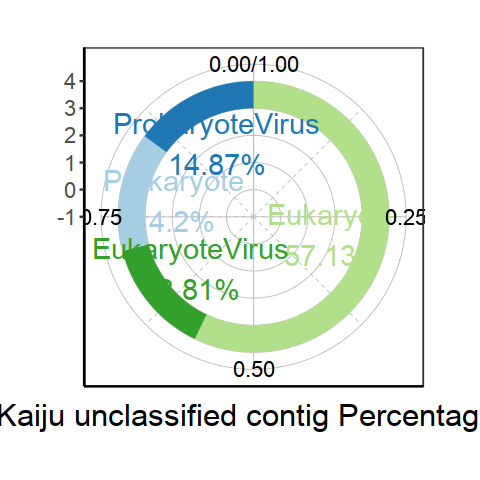

In [14]:
options(repr.plot.width=4, repr.plot.height=4)
# Make the plot
p_kaiju_uncl <- ggplot(kaiju_uncl_df, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=DEF_Class)) +
  geom_rect() +
  geom_text( x=2, aes(y=labelPosition, label=label, color=DEF_Class), size=6) + # x here controls label position (inner / outer)
  coord_polar(theta="y") +
  xlim(c(-1, 4)) +
  scale_fill_brewer(palette="Paired") + scale_color_brewer(palette="Paired") +
  my_theme1 + labs(y="Kaiju unclassified contig Percentages") +
  theme(legend.position = "none")
p_kaiju_uncl

In [15]:
metaeuk_uncl_df <- contig2type_df %>% 
    filter(MetaEuk_Class == "Unclassified") %>% 
    select(DEF_Class) %>% 
    group_by(DEF_Class) %>% 
    summarise(Count = n()) %>% 
    mutate(Fraction=Count/sum(Count)) %>% 
    mutate(DEF_Class = factor(DEF_Class, levels=c("Prokaryote", "ProkaryoteVirus", "Eukaryote", "EukaryoteVirus")))

# Compute the cumulative percentages (top of each rectangle)
metaeuk_uncl_df$ymax <- cumsum(metaeuk_uncl_df$Fraction)
# Compute the bottom of each rectangle
metaeuk_uncl_df$ymin <- c(0, head(metaeuk_uncl_df$ymax, n=-1))
# Compute label position
metaeuk_uncl_df$labelPosition <- (metaeuk_uncl_df$ymax + metaeuk_uncl_df$ymin) / 2
# Compute a good label
metaeuk_uncl_df$label <- paste0(metaeuk_uncl_df$DEF_Class, "\n", round(100*metaeuk_uncl_df$Fraction, digits=2), "%")
head(metaeuk_uncl_df)

DEF_Class,Count,Fraction,ymax,ymin,labelPosition,label
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Eukaryote,12705,0.3830384,0.3830384,0.0000000,0.1915192,Eukaryote 38.3%
EukaryoteVirus,5216,0.1572553,0.5402936,0.3830384,0.4616660,EukaryoteVirus 15.73%
Prokaryote,5674,0.1710633,0.7113570,0.5402936,0.6258253,Prokaryote 17.11%
ProkaryoteVirus,9574,0.2886430,1.0000000,0.7113570,0.8556785,ProkaryoteVirus 28.86%


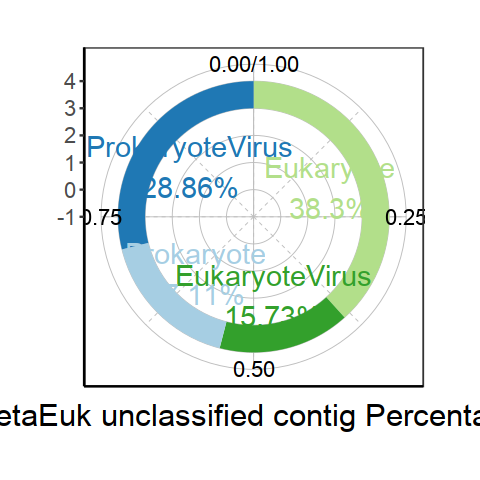

In [16]:
options(repr.plot.width=4, repr.plot.height=4)
# Make the plot
p_metaeuk_uncl <- ggplot(metaeuk_uncl_df, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=DEF_Class)) +
  geom_rect() +
  geom_text( x=2, aes(y=labelPosition, label=label, color=DEF_Class), size=6) + # x here controls label position (inner / outer)
  coord_polar(theta="y") +
  xlim(c(-1, 4)) +
  scale_fill_brewer(palette="Paired") + scale_color_brewer(palette="Paired") +
  my_theme1 + labs(y="MetaEuk unclassified contig Percentages") +
  theme(legend.position = "none")
p_metaeuk_uncl

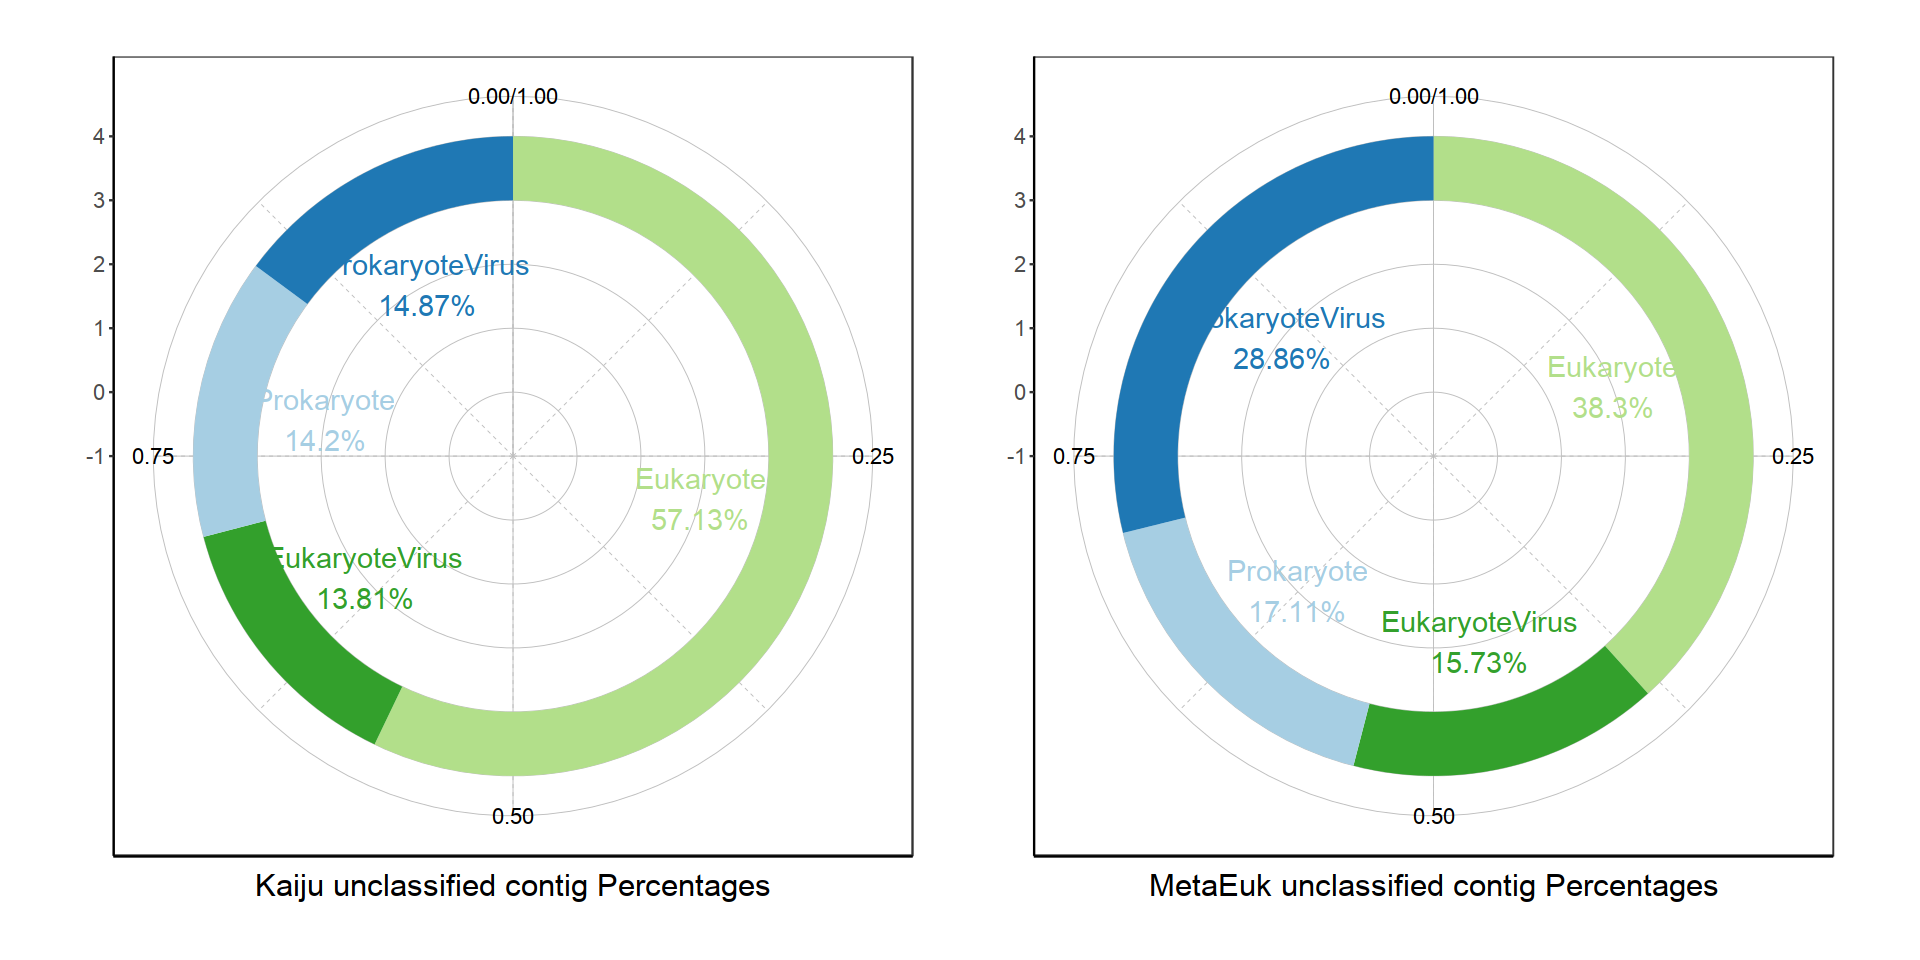

In [17]:
options(repr.plot.width=16, repr.plot.height=8)
library(patchwork)
p_kaiju_uncl + p_metaeuk_uncl

ggsave(filename="ESPAE_kaiju_metaeuk_DEF_bwa_percentage_plot_2k_unclassified.pdf", useDingbats=FALSE, 
       plot = last_plot(), path="./", 
       scale = 1, width = 320, height = 160, units = "mm",
       dpi = 300, limitsize = FALSE)

### - what are prokaryotes classified by both kaiju and metaeuk?

In [18]:
kaiju_metaeuk_prok_df <- contig2type_df[which(contig2type_df$Kaiju_Class == "Prokaryote" & contig2type_df$MetaEuk_Class == "Prokaryote"), c("DEF_Class"), drop=F]
head(kaiju_metaeuk_prok_df, 2)
nrow(kaiju_metaeuk_prok_df)
table(kaiju_metaeuk_prok_df)

,DEF_Class
,<chr>
ESP_1,Prokaryote
ESP_2,Prokaryote


[1] 194549

kaiju_metaeuk_prok_df
      Eukaryote  EukaryoteVirus      Prokaryote ProkaryoteVirus 
          23109            8048          143184           20208 

In [19]:
kaiju_metaeuk_prok_df <- contig2type_df %>% 
    filter(Kaiju_Class == "Prokaryote" & MetaEuk_Class == "Prokaryote") %>% 
    select(DEF_Class) %>% 
    group_by(DEF_Class) %>% 
    summarise(Count = n()) %>% 
    mutate(Fraction=Count/sum(Count)) %>% 
    mutate(DEF_Class = factor(DEF_Class, levels=c("Prokaryote", "ProkaryoteVirus", "Eukaryote", "EukaryoteVirus")))

# Compute the cumulative percentages (top of each rectangle)
kaiju_metaeuk_prok_df$ymax <- cumsum(kaiju_metaeuk_prok_df$Fraction)
# Compute the bottom of each rectangle
kaiju_metaeuk_prok_df$ymin <- c(0, head(kaiju_metaeuk_prok_df$ymax, n=-1))
# Compute label position
kaiju_metaeuk_prok_df$labelPosition <- (kaiju_metaeuk_prok_df$ymax + kaiju_metaeuk_prok_df$ymin) / 2
# Compute a good label
kaiju_metaeuk_prok_df$label <- paste0(kaiju_metaeuk_prok_df$DEF_Class, "\n", round(100*kaiju_metaeuk_prok_df$Fraction, digits=2), "%")
head(kaiju_metaeuk_prok_df)


DEF_Class,Count,Fraction,ymax,ymin,labelPosition,label
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Eukaryote,23109,0.11878241,0.1187824,0.0000000,0.05939121,Eukaryote 11.88%
EukaryoteVirus,8048,0.04136747,0.1601499,0.1187824,0.13946615,EukaryoteVirus 4.14%
Prokaryote,143184,0.73597911,0.8961290,0.1601499,0.52813944,Prokaryote 73.6%
ProkaryoteVirus,20208,0.10387100,1.0000000,0.8961290,0.94806450,ProkaryoteVirus 10.39%


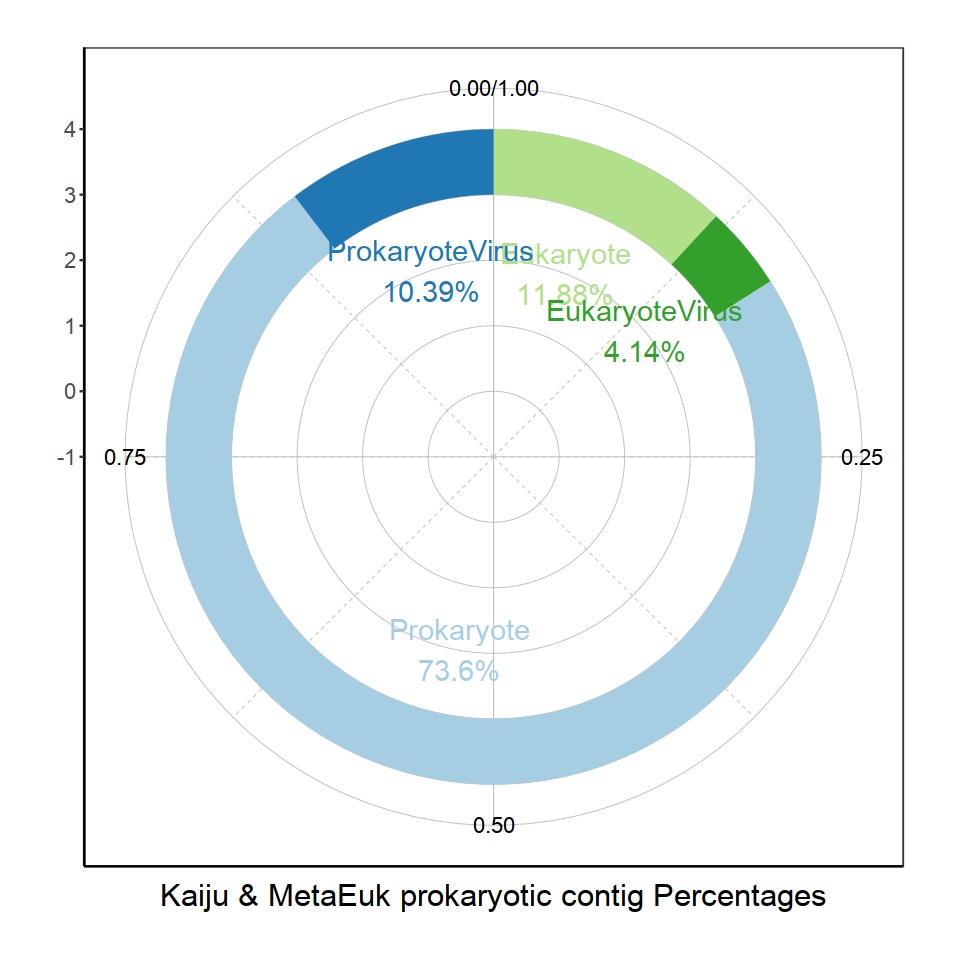

In [20]:
options(repr.plot.width=8, repr.plot.height=8)
# Make the plot
p_kaiju_metaeuk_prok <- ggplot(kaiju_metaeuk_prok_df, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=DEF_Class)) +
  geom_rect() +
  geom_text( x=2, aes(y=labelPosition, label=label, color=DEF_Class), size=6) + # x here controls label position (inner / outer)
  coord_polar(theta="y") +
  xlim(c(-1, 4)) +
  scale_fill_brewer(palette="Paired") + scale_color_brewer(palette="Paired") +
  my_theme1 + labs(y="Kaiju & MetaEuk prokaryotic contig Percentages") +
  theme(legend.position = "none")
p_kaiju_metaeuk_prok

ggsave(filename="ESPAE_kaiju_metaeuk_DEF_bwa_percentage_plot_2k_KaijuMetaEukProk.pdf", useDingbats=FALSE, 
       plot = last_plot(), path="./", 
       scale = 1, width = 320, height = 160, units = "mm",
       dpi = 300, limitsize = FALSE)

### - calculate and plot mapped read ratios 

In [21]:
map_glbpct_df <- metadata_df[, c("Month_Day", "Total_Reads")]
map_glbpct_df[, "MappedRatio"] <-  100 * def_relpct_df$TotalCnt / map_glbpct_df$Total_Reads
head(map_glbpct_df,2)

,Month_Day,Total_Reads,MappedRatio
,<chr>,<int>,<dbl>
ESPAEMG01_S37_L003,Mar_18,81077508,47.89569
ESPAEMG02_S38_L003,Mar_19,69411938,49.81586


In [22]:
map_glbpct_df$Month_Day

[1] "Mar_18" "Mar_19" "Mar_20" "Mar_21" "Mar_22" "Mar_23" "Apr_08" "Apr_09"
 [9] "Apr_10" "Apr_11" "Apr_12" "Apr_13" "Apr_14" "Apr_15" "Apr_16" "Apr_17"
[17] "Apr_18" "Apr_19" "Apr_20" "Apr_21" "Apr_22" "Apr_23" "Apr_24" "Apr_25"
[25] "Apr_26" "Apr_27" "Apr_28" "Apr_30" "May_01"

,Month_Day,Total_Reads,MappedRatio
,<fct>,<int>,<dbl>
1,Mar_18,81077508,47.89569
2,Mar_19,69411938,49.81586


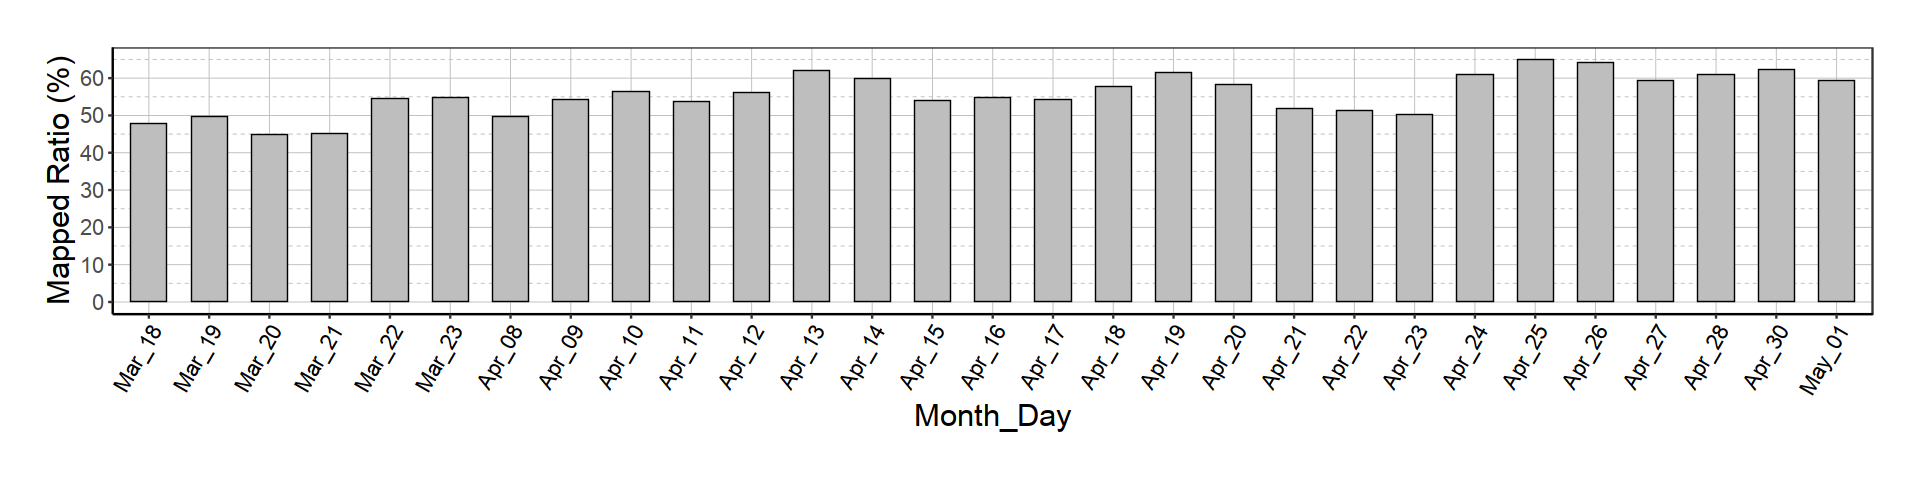

In [23]:
options(repr.plot.width=16, repr.plot.height=4)

# select columns to plot map ratio for 2k
Date_order <- map_glbpct_df$Month_Day
map_glbpct_df <- map_glbpct_df %>% 
  mutate(Month_Day = factor(Month_Day, levels=Date_order)) %>%
  select(Month_Day, Total_Reads, MappedRatio)
head(map_glbpct_df, 2)

# plot map ratio
p_map_ratio <- ggplot(data=map_glbpct_df) + 
  geom_bar(mapping=aes(x=Month_Day, y=MappedRatio), 
           position=position_dodge(.6), width=0.6, stat="identity", colour="black", fill="gray", size=.3) + 
  scale_y_continuous(minor_breaks = seq(0, 100, 5), breaks = seq(0, 100, 10)) +
  labs(y="Mapped Ratio (%)") + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1))
p_map_ratio

In [24]:
head(def_relpct_df)
head(metadata_df)

,Eukaryote,EukaryoteVirus,Plasmid,Prokaryote,ProkaryoteVirus,TotalCnt
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
ESPAEMG01_S37_L003,40.31839,7.053498,15.35859,25.12076,12.14876,38832631
ESPAEMG02_S38_L003,36.76776,8.194319,17.02703,26.90813,11.10276,34578152
ESPAEMG03_S39_L003,42.81688,7.705977,14.28477,24.50001,10.69237,42372639
ESPAEMG04_S40_L003,42.81619,5.663577,15.02724,23.61157,12.88143,36732141
ESPAEMG05_S41_L003,38.79953,4.968309,17.85638,27.82794,10.54784,40622757
ESPAEMG06_S42_L003,37.43247,4.851846,17.84101,28.32592,11.54876,54393687


,Library_Type,Filter_Fraction,Month_Day,Month,Day,Time,Temperature,Depth,Salinity,Chlorophyll,Transmission,Total_Reads
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
ESPAEMG01_S37_L003,MG,AE,Mar_18,3,18,AM,16.140,9.740,33.447,0.40,94.1,81077508
ESPAEMG02_S38_L003,MG,AE,Mar_19,3,19,AM,16.250,8.625,33.447,0.82,95.1,69411938
ESPAEMG03_S39_L003,MG,AE,Mar_20,3,20,AM,16.283,4.689,33.448,0.54,94.6,94646542
ESPAEMG04_S40_L003,MG,AE,Mar_21,3,21,AM,16.597,3.929,33.489,0.65,94.8,81187940
ESPAEMG05_S41_L003,MG,AE,Mar_22,3,22,AM,16.652,3.259,33.524,0.68,95.9,74567740
ESPAEMG06_S42_L003,MG,AE,Mar_23,3,23,AM,16.559,3.306,33.523,0.78,94.8,99165690


### - plot DeepMicrobeFinder class percentages of all reads (global percentages)

$GlobalPercentage = 100 * \dfrac{MappedReads * \dfrac{RelativePercentage}{100}}{AllReads} = MappedReads * \dfrac{RelativePercentage}{AllReads}$

In [25]:
def_glbpct_meta_df <- subset(def_relpct_df, select=-c(TotalCnt))
def_glbpct_meta_df <- def_glbpct_meta_df * def_relpct_df$TotalCnt / metadata_df$Total_Reads
def_glbpct_meta_df["Month_Day"] <- metadata_df[, c("Month_Day")]
head(def_glbpct_meta_df, 2)

,Eukaryote,EukaryoteVirus,Plasmid,Prokaryote,ProkaryoteVirus,Month_Day
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ESPAEMG01_S37_L003,19.31077,3.378322,7.356102,12.03176,5.818735,Mar_18
ESPAEMG02_S38_L003,18.31618,4.082070,8.482161,13.40452,5.530933,Mar_19


In [26]:
def_glbpct_meta_df.long <- def_glbpct_meta_df %>% 
  mutate(Month_Day = factor(Month_Day, levels=Date_order)) %>% 
  mutate(ProkPlas = Plasmid + Prokaryote) %>% 
  #select(Month_Day, Eukaryote, EukaryoteVirus, Plasmid, Prokaryote, ProkaryoteVirus) %>% 
  select(Month_Day, Eukaryote, EukaryoteVirus, ProkPlas, ProkaryoteVirus) %>% 
  gather(Eukaryote:ProkaryoteVirus, key="Seq_Class", value="Percentage") %>% 
  #mutate(Seq_Class = factor(Seq_Class, levels=c("Prokaryote", "ProkaryoteVirus", "Eukaryote", "EukaryoteVirus", "Plasmid"))) 
  mutate(Seq_Class = factor(Seq_Class, levels=c("ProkPlas", "ProkaryoteVirus", "Eukaryote", "EukaryoteVirus"))) 

head(def_glbpct_meta_df.long, 2)

,Month_Day,Seq_Class,Percentage
,<fct>,<fct>,<dbl>
1,Mar_18,Eukaryote,19.31077
2,Mar_19,Eukaryote,18.31618


,xmin,xmax
,<dbl>,<dbl>
1,1.5,2.5
2,3.5,4.5


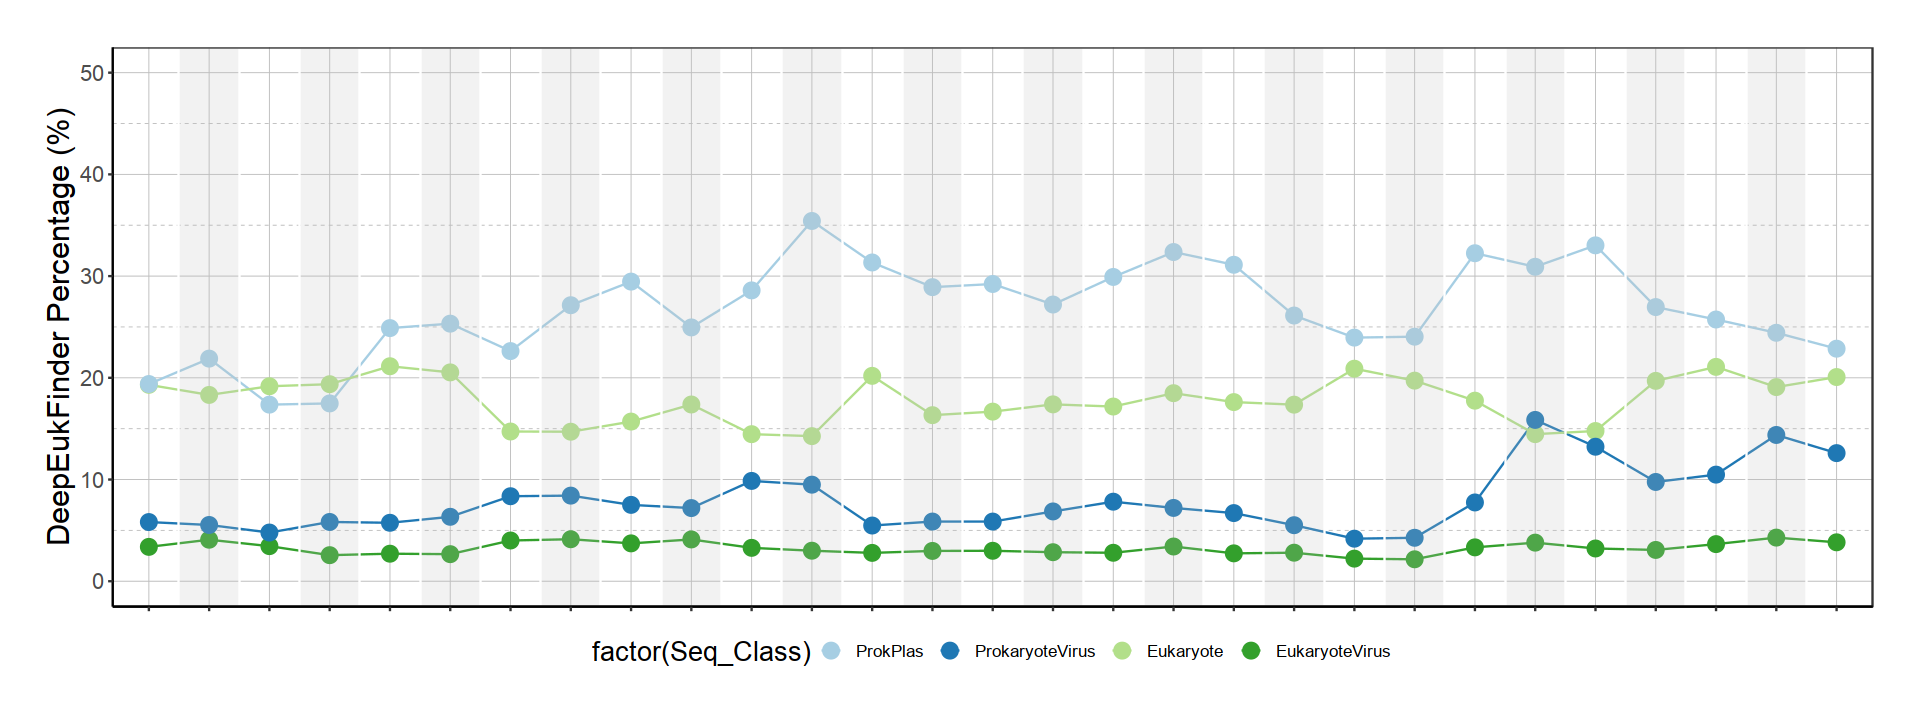

In [27]:
options(repr.plot.width=16, repr.plot.height=6)

# rects
rects <- data.frame(xmin = seq(1.5, 28.5, 2), 
                    xmax = seq(2.5, 29.5, 2))
head(rects, 2)

# plot with rects
p_def_with_rects <- ggplot(data=def_glbpct_meta_df.long, mapping=aes(x=Month_Day, y=Percentage, group=factor(Seq_Class), color=factor(Seq_Class))) + 
  geom_line(size=.5) + 
  geom_point(aes(fill=factor(Seq_Class)), size=4, shape=21) + 
  geom_rect(data=rects, mapping=aes(xmin=xmin, xmax=xmax, ymin = -Inf, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  scale_color_brewer(palette="Paired") + scale_fill_brewer(palette="Paired") + 
  scale_y_continuous(limits = c(0, 50), minor_breaks = seq(0, 50, 5), breaks = seq(0, 50, 10)) +
  my_theme1 + labs(y="DeepMicrobeFinder Percentage (%)") +
  theme(axis.text.x=element_blank(), axis.title.x=element_blank(), legend.position = "bottom")
  #theme(axis.text.x=element_text(angle=60,vjust=1), legend.position="bottom")
p_def_with_rects

### - plot kaiju SeqType percentages

In [28]:
kaiju_glbpct_meta_df <- subset(kaiju_relpct_df, select=-c(TotalCnt))
kaiju_glbpct_meta_df <- kaiju_glbpct_meta_df * kaiju_relpct_df$TotalCnt / metadata_df$Total_Reads
kaiju_glbpct_meta_df["Month_Day"] <- metadata_df[, c("Month_Day")]
head(kaiju_glbpct_meta_df, 2)

,Eukaryote,EukaryoticVirus,Prokaryote,ProkaryoticVirus,Unclassified,UnclassifiedVirus,Month_Day
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ESPAEMG01_S37_L003,10.557879,0.3904708,25.01766,1.706012,9.88857,0.3351003,Mar_18
ESPAEMG02_S38_L003,9.934517,0.3940734,27.12923,1.655251,10.36602,0.3367663,Mar_19


In [29]:
kaiju_glbpct_meta_df.long <- kaiju_glbpct_meta_df %>% 
  mutate(Month_Day = factor(Month_Day, levels=Date_order)) %>% 
  select(Month_Day, Eukaryote, EukaryoticVirus, Prokaryote, ProkaryoticVirus, Unclassified, UnclassifiedVirus) %>% 
  gather(Eukaryote:UnclassifiedVirus, key="Seq_Class", value="Percentage") %>% 
  #mutate(Seq_Class = factor(Seq_Class, levels=c("Prokaryote", "ProkaryoteVirus", "Eukaryote", "EukaryoteVirus", "Plasmid"))) 
  mutate(Seq_Class = factor(Seq_Class, levels=c("Prokaryote", "ProkaryoticVirus", "Eukaryote", "EukaryoticVirus", "Unclassified", "UnclassifiedVirus"))) 

head(kaiju_glbpct_meta_df.long, 2)

,Month_Day,Seq_Class,Percentage
,<fct>,<fct>,<dbl>
1,Mar_18,Eukaryote,10.557879
2,Mar_19,Eukaryote,9.934517


,xmin,xmax
,<dbl>,<dbl>
1,1.5,2.5
2,3.5,4.5


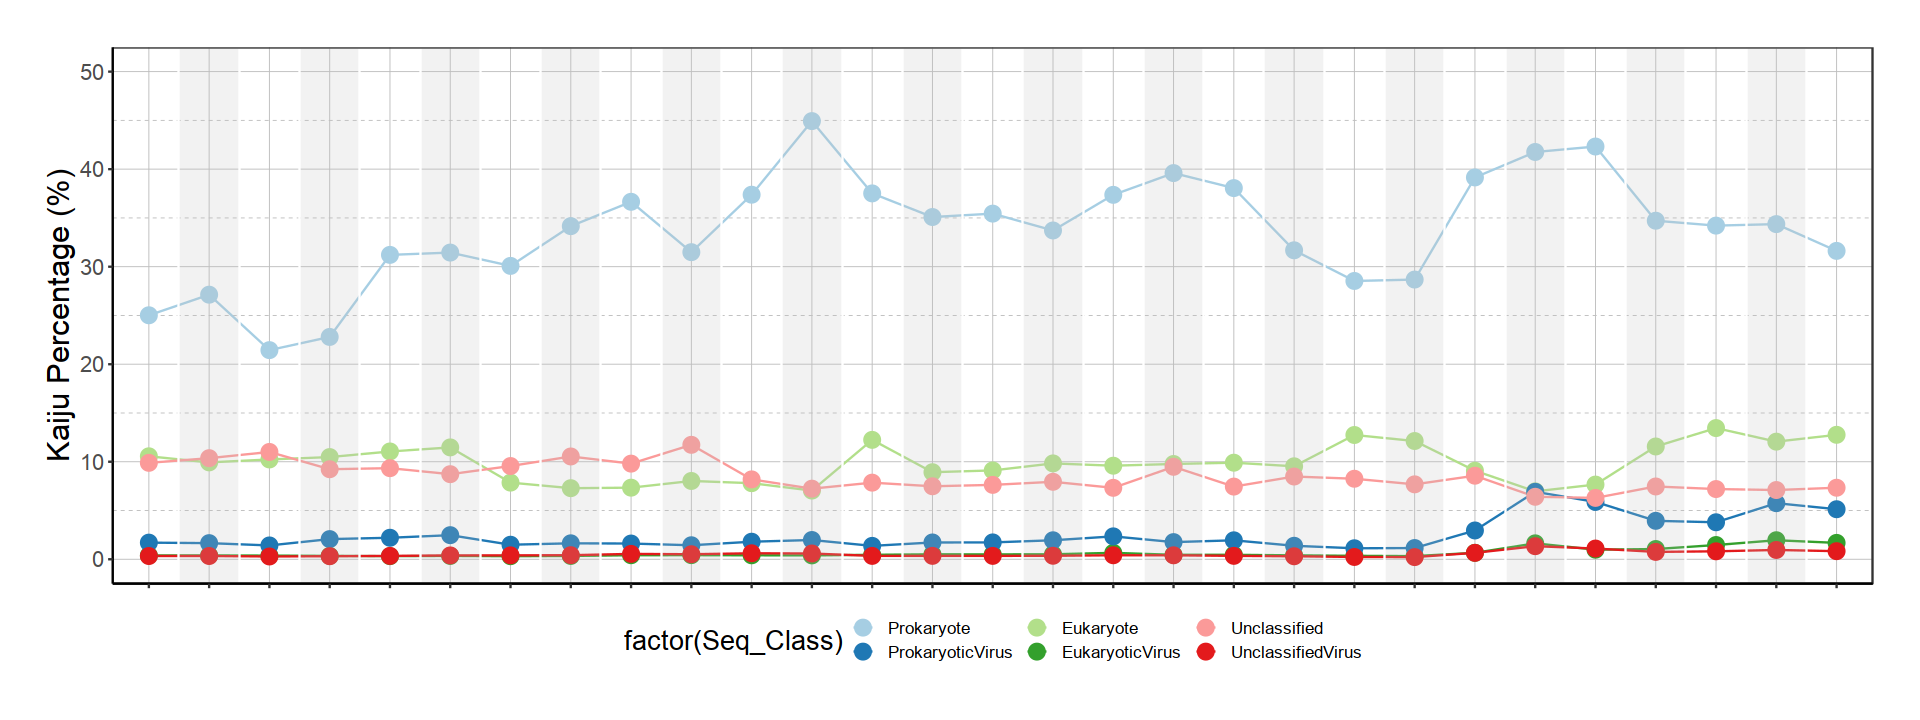

In [30]:
options(repr.plot.width=16, repr.plot.height=6)

# rects
rects <- data.frame(xmin = seq(1.5, 28.5, 2), 
                    xmax = seq(2.5, 29.5, 2))
head(rects, 2)

# plot with rects
p_kaiju_with_rects <- ggplot(data=kaiju_glbpct_meta_df.long, mapping=aes(x=Month_Day, y=Percentage, group=factor(Seq_Class), color=factor(Seq_Class))) + 
  geom_line(size=.5) + 
  geom_point(aes(fill=factor(Seq_Class)), size=4, shape=21) + 
  geom_rect(data=rects, mapping=aes(xmin=xmin, xmax=xmax, ymin = -Inf, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  scale_color_brewer(palette="Paired") + scale_fill_brewer(palette="Paired") + 
  scale_y_continuous(limits = c(0, 50), minor_breaks = seq(0, 50, 5), breaks = seq(0, 50, 10)) +
  my_theme1 + labs(y="Kaiju Percentage (%)") +
  theme(axis.text.x=element_blank(), axis.title.x=element_blank(), legend.position = "bottom")
  #theme(axis.text.x=element_text(angle=60,vjust=1), legend.position="bottom")
p_kaiju_with_rects

### - plot metaeuk SeqType percentages

In [31]:
metaeuk_glbpct_meta_df <- subset(metaeuk_relpct_df, select=-c(TotalCnt))
metaeuk_glbpct_meta_df <- metaeuk_glbpct_meta_df * metaeuk_relpct_df$TotalCnt / metadata_df$Total_Reads
metaeuk_glbpct_meta_df["Month_Day"] <- metadata_df[, c("Month_Day")]
head(metaeuk_glbpct_meta_df, 2)

,Eukaryote,EukaryoticVirus,Prokaryote,ProkaryoticVirus,Unclassified,UnclassifiedVirus,Month_Day
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ESPAEMG01_S37_L003,15.38599,0.1979279,25.94242,0.4660479,5.778818,0.1244797,Mar_18
ESPAEMG02_S38_L003,15.02124,0.1946049,28.10232,0.4783687,5.899707,0.1196192,Mar_19


In [32]:
metaeuk_glbpct_meta_df.long <- metaeuk_glbpct_meta_df %>% 
  mutate(Month_Day = factor(Month_Day, levels=Date_order)) %>% 
  select(Month_Day, Eukaryote, EukaryoticVirus, Prokaryote, ProkaryoticVirus, Unclassified, UnclassifiedVirus) %>% 
  gather(Eukaryote:UnclassifiedVirus, key="Seq_Class", value="Percentage") %>% 
  #mutate(Seq_Class = factor(Seq_Class, levels=c("Prokaryote", "ProkaryoteVirus", "Eukaryote", "EukaryoteVirus", "Plasmid"))) 
  mutate(Seq_Class = factor(Seq_Class, levels=c("Prokaryote", "ProkaryoticVirus", "Eukaryote", "EukaryoticVirus", "Unclassified", "UnclassifiedVirus"))) 

head(metaeuk_glbpct_meta_df.long, 2)

,Month_Day,Seq_Class,Percentage
,<fct>,<fct>,<dbl>
1,Mar_18,Eukaryote,15.38599
2,Mar_19,Eukaryote,15.02124


,xmin,xmax
,<dbl>,<dbl>
1,1.5,2.5
2,3.5,4.5


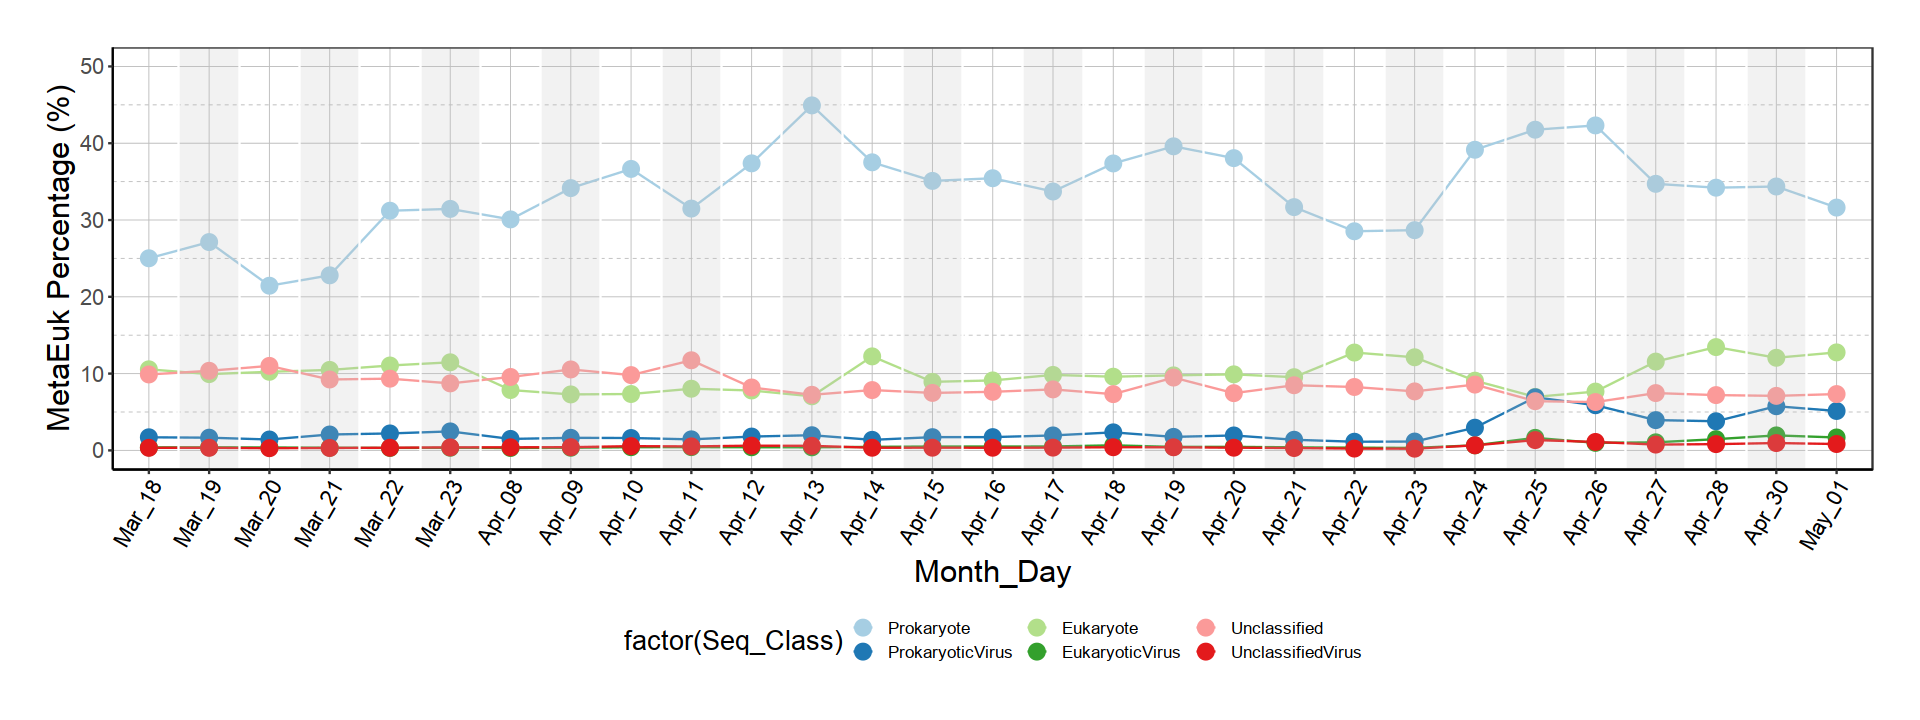

In [33]:
options(repr.plot.width=16, repr.plot.height=6)

# rects
rects <- data.frame(xmin = seq(1.5, 28.5, 2), 
                    xmax = seq(2.5, 29.5, 2))
head(rects, 2)

# plot with rects
p_metaeuk_with_rects <- ggplot(data=kaiju_glbpct_meta_df.long, mapping=aes(x=Month_Day, y=Percentage, group=factor(Seq_Class), color=factor(Seq_Class))) + 
  geom_line(size=.5) + 
  geom_point(aes(fill=factor(Seq_Class)), size=4, shape=21) + 
  geom_rect(data=rects, mapping=aes(xmin=xmin, xmax=xmax, ymin = -Inf, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  scale_color_brewer(palette="Paired") + scale_fill_brewer(palette="Paired") + 
  scale_y_continuous(limits = c(0, 50), minor_breaks = seq(0, 50, 5), breaks = seq(0, 50, 10)) +
  my_theme1 + labs(y="MetaEuk Percentage (%)") +  
  theme(axis.text.x=element_text(angle=60,vjust=1), legend.position="bottom")
p_metaeuk_with_rects

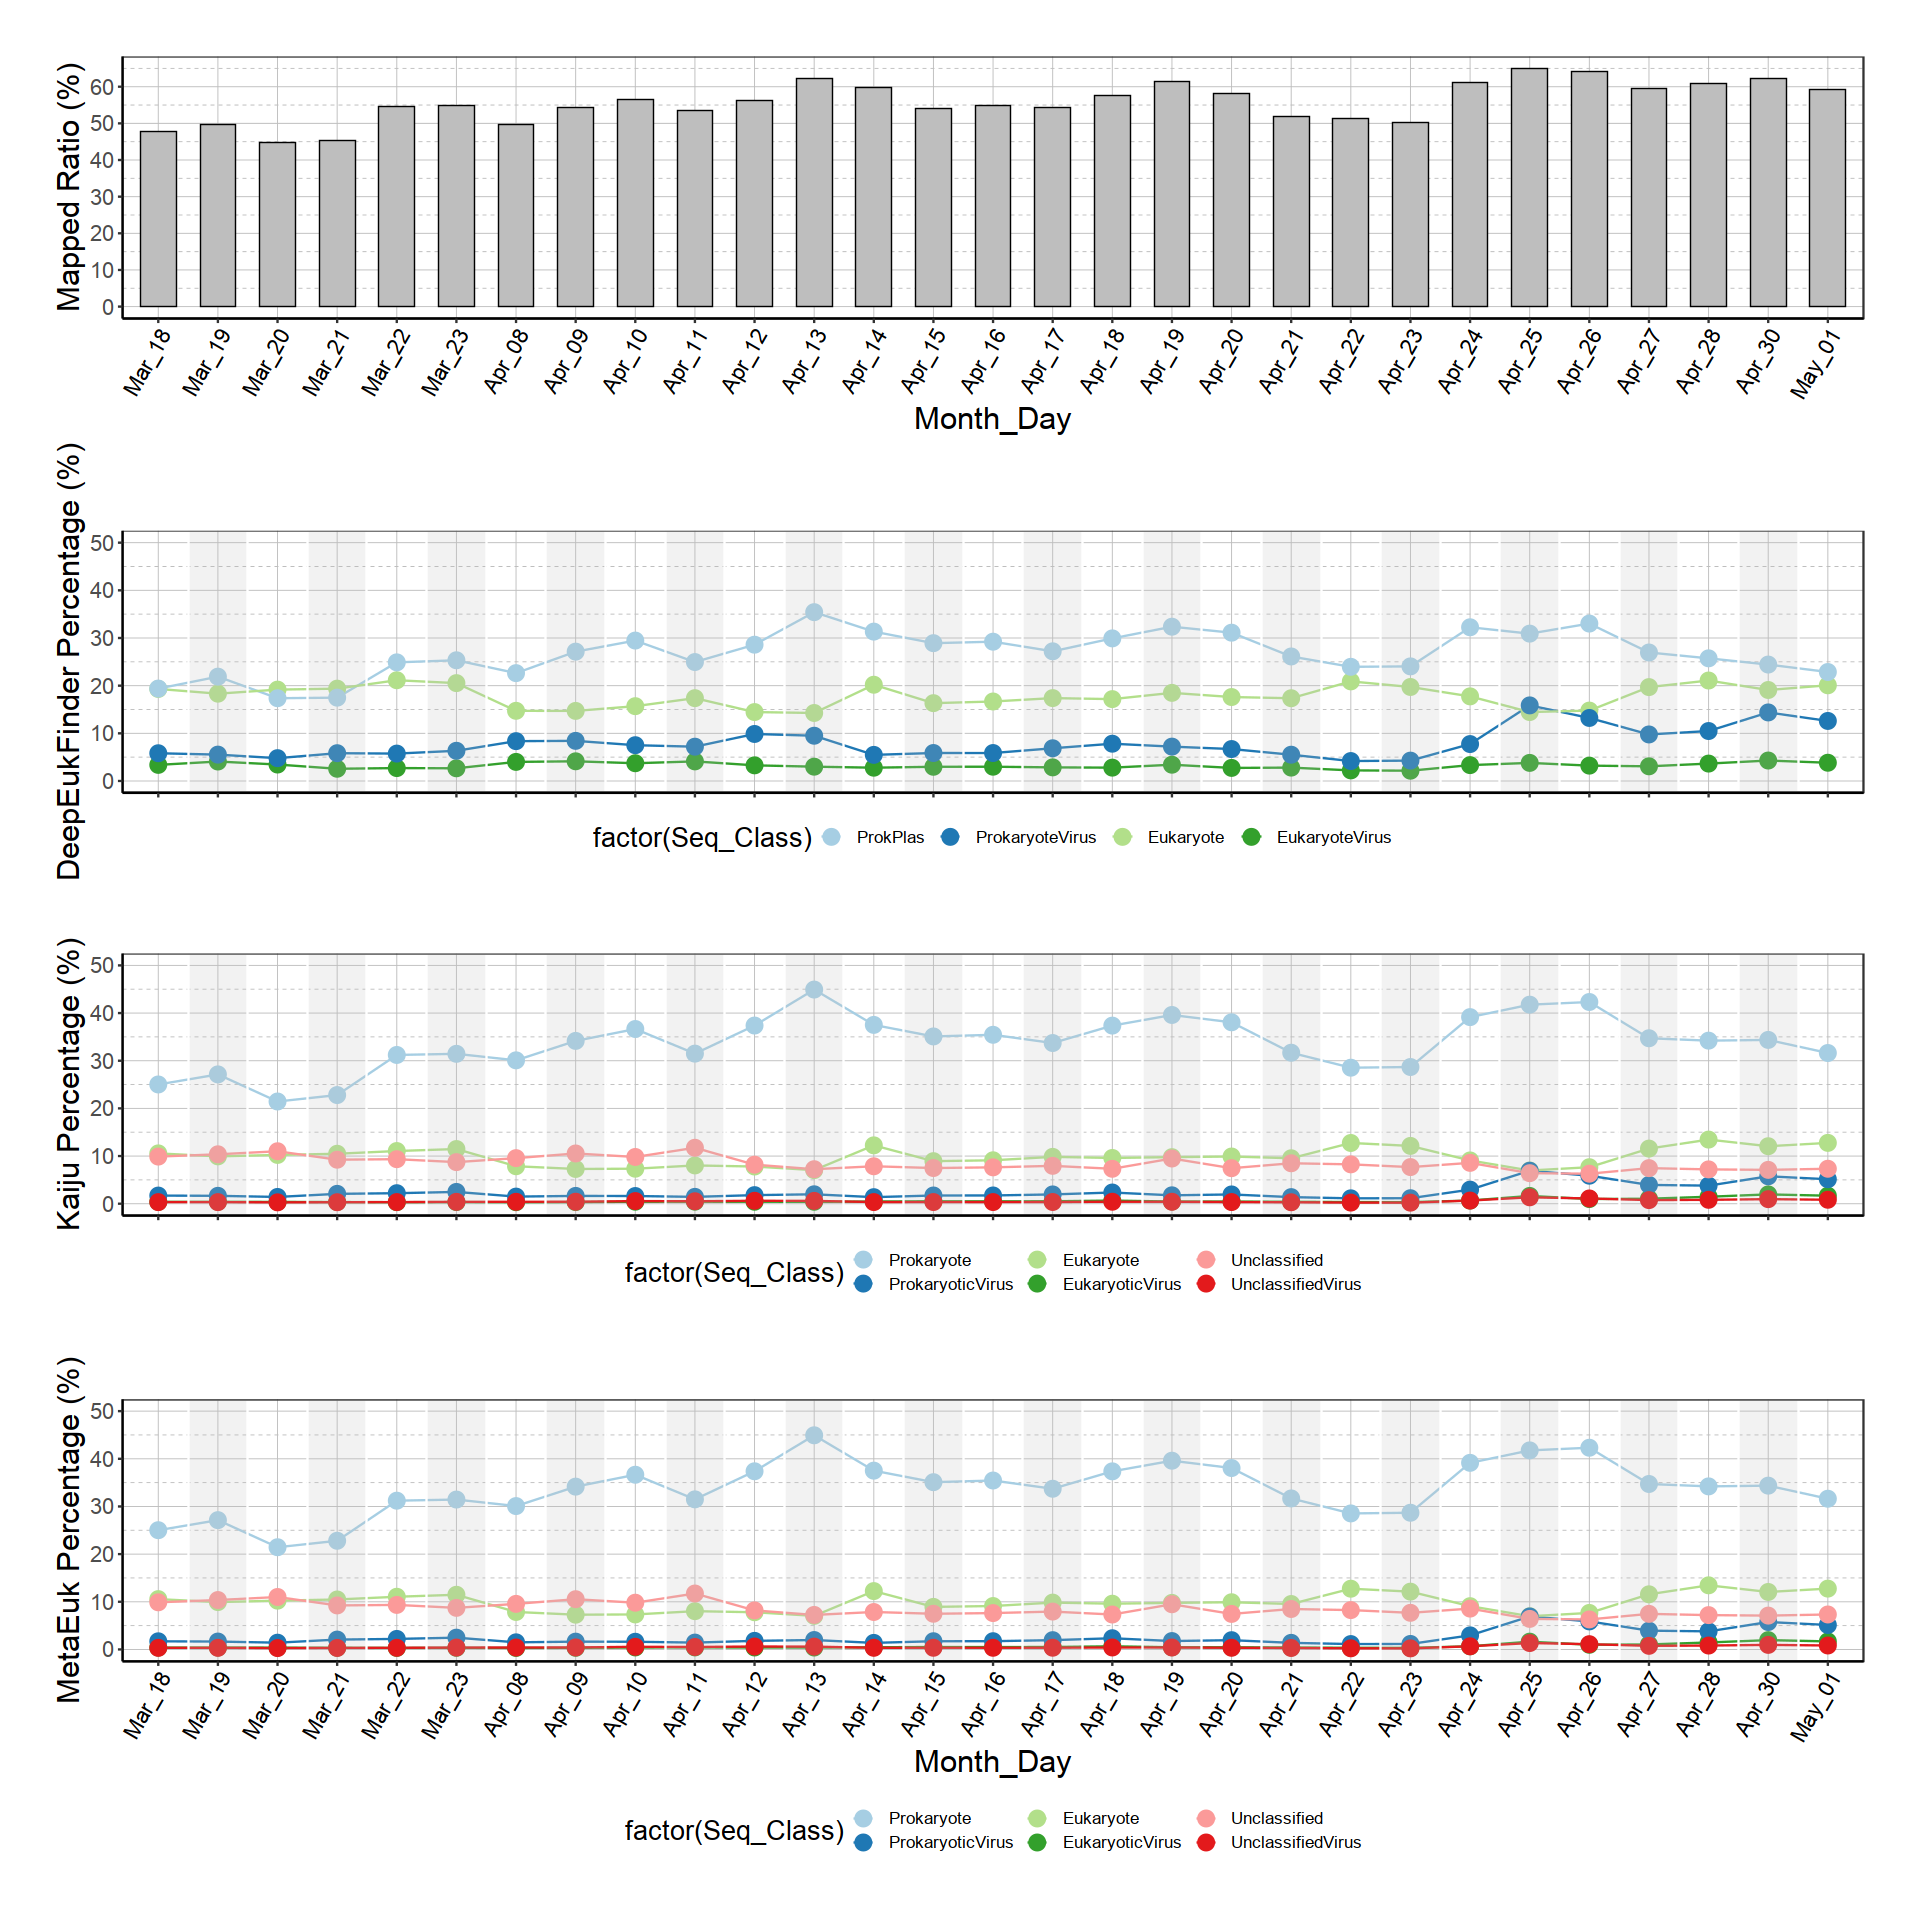

In [34]:
options(repr.plot.width=16, repr.plot.height=16)

library(patchwork)
p_map_ratio / p_def_with_rects / p_kaiju_with_rects / p_metaeuk_with_rects

ggsave(filename="ESPAE_kaiju_metaeuk_DEF_bwa_percentage_plot_2k_mapped.pdf", useDingbats=FALSE, 
       plot = last_plot(), path="./", 
       scale = 1, width = 400, height = 400, units = "mm",
       dpi = 300, limitsize = FALSE)

- correlations between eukaryotic percentages

metaeuk     kaiju       def 
13.738711  9.876705 17.855426

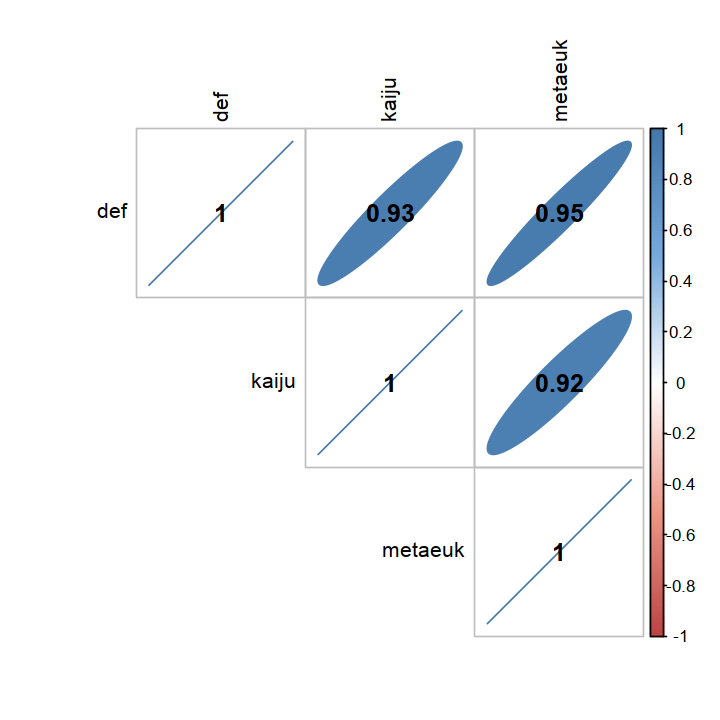

In [82]:
options(repr.plot.width=6, repr.plot.height=6)

library("Hmisc")
library("corrplot")
#library(SPRING)

euk_pct_df <- data.frame(metaeuk=metaeuk_glbpct_meta_df$Eukaryote, 
                         kaiju=kaiju_glbpct_meta_df$Eukaryote, 
                         def=def_glbpct_meta_df$Eukaryote)
#euk_pct_df.mclr <- mclr(euk_pct_df)

colMeans(euk_pct_df)

# `rcorr`
res2k <- rcorr(as.matrix(euk_pct_df))
res2k.r <- res2k$r
res2k.P <- res2k$P

col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))

#pdf(file = "ESPAE_kaiju_metaeuk_DEF_bwa_percentage_plot_2k_mapped_corrplot_euk.pdf")
corrplot(res2k.r, method = "ellipse", col = col(200), #method = "color",
         type = "upper", order = "alphabet", number.cex = 1.2,
         addCoef.col = "black", # Add coefficient of correlation
         tl.col = "black", tl.srt = 90, # Text label color and rotation
         # Combine with significance
         p.mat = res2k.P, sig.level = 0.01, insig = "blank", 
         # show correlation coefficient on the principal diagonal
         diag = TRUE)
#dev.off()

In [52]:
cor_fun <- function(x, y, method){
  tmp <- cor.test(x, y, method= method)
  cbind(r=tmp$estimate, p=tmp$p.value)
}

cor_results <- apply(X=euk_pct_df, MARGIN=2, FUN=cor_fun, x=euk_pct_df[, 3], method="spearman")
rownames(cor_results) <- c("cor", "p.value")
cor_results

,metaeuk,kaiju,def
cor,9.596059e-01,9.374384e-01,1
p.value,5.676828e-09,1.265391e-07,0


metaeuk    kaiju      def 
34.36465 33.70863 17.24486

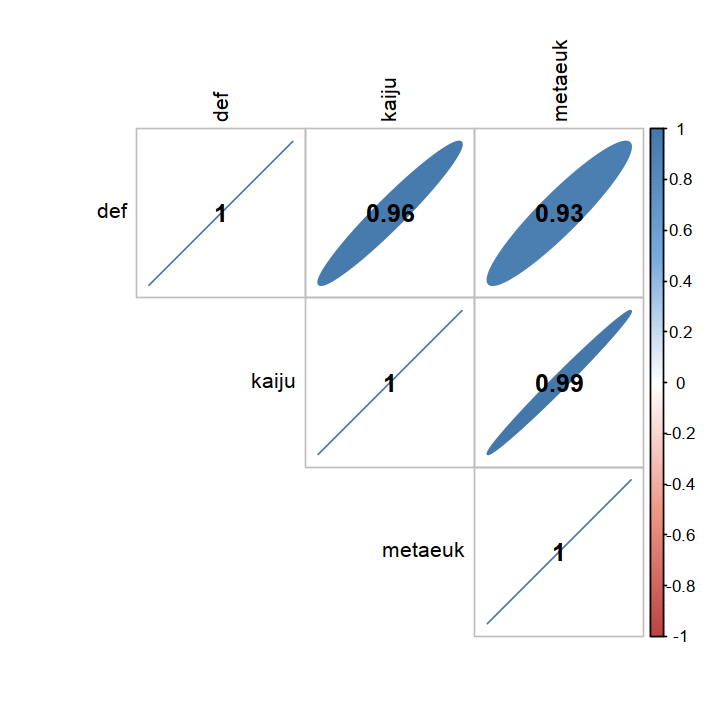

In [83]:
options(repr.plot.width=6, repr.plot.height=6)

library("Hmisc")
library("corrplot")

prok_pct_df <- data.frame(metaeuk=metaeuk_glbpct_meta_df$Prokaryote, 
                         kaiju=kaiju_glbpct_meta_df$Prokaryote, 
                         def=def_glbpct_meta_df$Prokaryote)
colMeans(prok_pct_df)

# `rcorr`
res2k <- rcorr(as.matrix(prok_pct_df))
res2k.r <- res2k$r
res2k.P <- res2k$P

col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))

#pdf(file = "ESPAE_kaiju_metaeuk_DEF_bwa_percentage_plot_2k_mapped_corrplot_prok.pdf")
corrplot(res2k.r, method = "ellipse", col = col(200), #method = "color",
         type = "upper", order = "alphabet", number.cex = 1.2,
         addCoef.col = "black", # Add coefficient of correlation
         tl.col = "black", tl.srt = 90, # Text label color and rotation
         # Combine with significance
         p.mat = res2k.P, sig.level = 0.01, insig = "blank", 
         # show correlation coefficient on the principal diagonal
         diag = TRUE)
#dev.off()

metaeuk     kaiju       def 
0.7509478 2.4947145 7.8855691

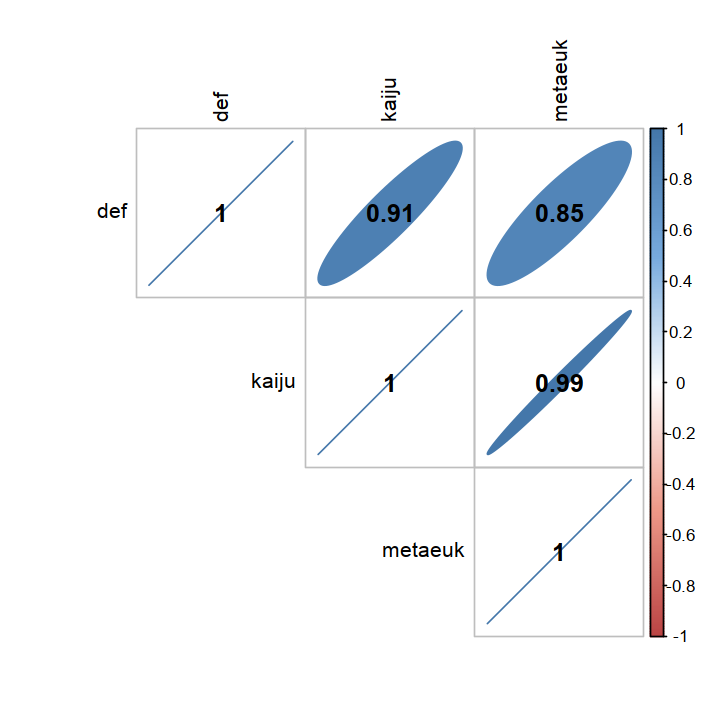

In [84]:
options(repr.plot.width=6, repr.plot.height=6)

library("Hmisc")
library("corrplot")

prokvir_pct_df <- data.frame(metaeuk=metaeuk_glbpct_meta_df$ProkaryoticVirus, 
                         kaiju=kaiju_glbpct_meta_df$ProkaryoticVirus, 
                         def=def_glbpct_meta_df$ProkaryoteVirus)
colMeans(prokvir_pct_df)

# `rcorr`
res2k <- rcorr(as.matrix(prokvir_pct_df))
res2k.r <- res2k$r
res2k.P <- res2k$P

col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))

#pdf(file = "ESPAE_kaiju_metaeuk_DEF_bwa_percentage_plot_2k_mapped_corrplot_prokvir.pdf")
corrplot(res2k.r, method = "ellipse", col = col(200), #method = "color",
         type = "upper", order = "alphabet", number.cex = 1.2,
         addCoef.col = "black", # Add coefficient of correlation
         tl.col = "black", tl.srt = 90, # Text label color and rotation
         # Combine with significance
         p.mat = res2k.P, sig.level = 0.01, insig = "blank", 
         # show correlation coefficient on the principal diagonal
         diag = TRUE)

#dev.off()

metaeuk     kaiju       def 
0.3139529 0.6396204 3.2420909

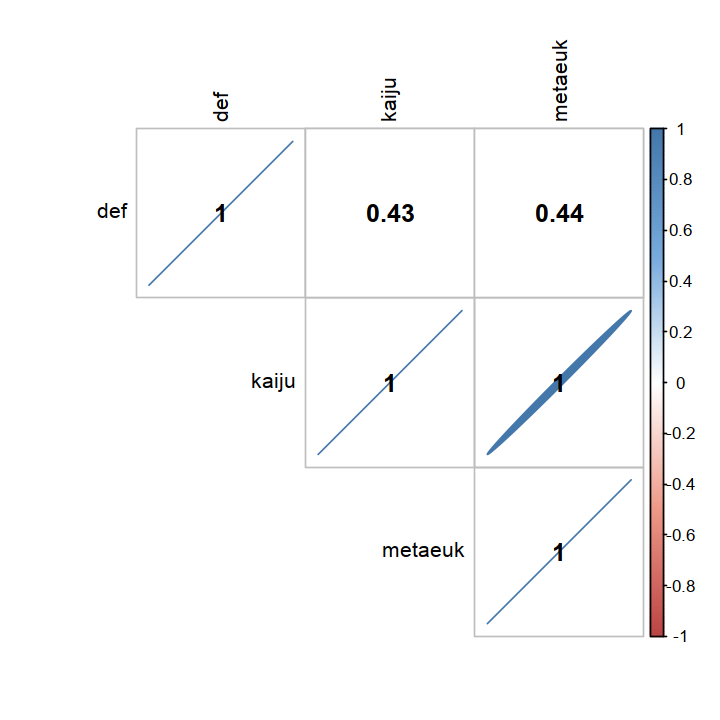

In [85]:
options(repr.plot.width=6, repr.plot.height=6)

library("Hmisc")
library("corrplot")

eukvir_pct_df <- data.frame(metaeuk=metaeuk_glbpct_meta_df$EukaryoticVirus, 
                         kaiju=kaiju_glbpct_meta_df$EukaryoticVirus, 
                         def=def_glbpct_meta_df$EukaryoteVirus)
colMeans(eukvir_pct_df)

# `rcorr`
res2k <- rcorr(as.matrix(eukvir_pct_df))
res2k.r <- res2k$r
res2k.P <- res2k$P

col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))

#pdf(file = "ESPAE_kaiju_metaeuk_DEF_bwa_percentage_plot_2k_mapped_corrplot_eukvir.pdf")
corrplot(res2k.r, method = "ellipse", col = col(200), #method = "color",
         type = "upper", order = "alphabet", number.cex = 1.2,
         addCoef.col = "black", # Add coefficient of correlation
         tl.col = "black", tl.srt = 90, # Text label color and rotation
         # Combine with significance
         p.mat = res2k.P, sig.level = 0.01, insig = "blank", 
         # show correlation coefficient on the principal diagonal
         diag = TRUE)
#dev.off()

### read in gRodon

In [353]:
gRodon_results_All <- "/home/shengwei/VirEncAct/@@DEF_Visualization/plot_ESPAE/ESPAEMG_gRodon_OGT.tsv"
gRodon_results_ProkPlas <- "/home/shengwei/VirEncAct/@@DEF_Visualization/plot_ESPAE/ESPAEMG_gRodon_OGT_ProkPlas.tsv"
gRodon_df_All <- read.table(gRodon_results_All, header = T, sep = "\t", as.is = T, stringsAsFactors = F)
gRodon_df <- read.table(gRodon_results_ProkPlas, header = T, sep = "\t", as.is = T, stringsAsFactors = F)

head(gRodon_df, 2)

,Sample_Name,Month_Day,Month,Day,CUBHE,ConsistencyHE,CPB,FilteredSequences,OGT,d,LowerCI,UpperCI
,<chr>,<chr>,<int>,<int>,<dbl>,<lgl>,<lgl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,ESPAEMG01_S37_L003,Mar_18,3,18,0.9016142,NA,NA,20975,16.14,0.8036018,0.6089447,1.072563
2,ESPAEMG02_S38_L003,Mar_19,3,19,0.8339356,NA,NA,23636,16.25,1.2583083,0.9799005,1.630700


In [354]:
### global percentages
head(def_glbpct_meta_df, 2)
### relative percentages 
def_relpct_meta_df <- subset(def_relpct_df, select=-c(TotalCnt))
def_relpct_meta_df["Month_Day"] <- metadata_df[, c("Month_Day")]
head(def_relpct_meta_df, 2)

### use global
read_pct_meta_df <- def_glbpct_meta_df
read_pct_meta_df["ProkPlas"] <- read_pct_meta_df["Prokaryote"] + read_pct_meta_df["Plasmid"]
read_pct_meta_df <- read_pct_meta_df[, -which(colnames(read_pct_meta_df) %in% c("Prokaryote", "Plasmid"))]
head(read_pct_meta_df, 2)

,Eukaryote,EukaryoteVirus,Plasmid,Prokaryote,ProkaryoteVirus,Month_Day
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ESPAEMG01_S37_L003,19.31077,3.378322,7.356102,12.03176,5.818735,Mar_18
ESPAEMG02_S38_L003,18.31618,4.082070,8.482161,13.40452,5.530933,Mar_19


,Eukaryote,EukaryoteVirus,Plasmid,Prokaryote,ProkaryoteVirus,Month_Day
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ESPAEMG01_S37_L003,40.31839,7.053498,15.35859,25.12076,12.14876,Mar_18
ESPAEMG02_S38_L003,36.76776,8.194319,17.02703,26.90813,11.10276,Mar_19


,Eukaryote,EukaryoteVirus,ProkaryoteVirus,Month_Day,ProkPlas
,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
ESPAEMG01_S37_L003,19.31077,3.378322,5.818735,Mar_18,19.38786
ESPAEMG02_S38_L003,18.31618,4.082070,5.530933,Mar_19,21.88668


In [355]:
# add DoublingTime
read_pct_meta_df["DoublingTime"] <- gRodon_df[, "d"]
# d = ln(2)/u  ==> u = ln(2)/d ==> u = 24*ln(2)/d
read_pct_meta_df["GrowthRate"] <- 24*log(2)/(read_pct_meta_df["DoublingTime"])
head(read_pct_meta_df, 2)

,Eukaryote,EukaryoteVirus,ProkaryoteVirus,Month_Day,ProkPlas,DoublingTime,GrowthRate
,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
ESPAEMG01_S37_L003,19.31077,3.378322,5.818735,Mar_18,19.38786,0.8036018,20.70121
ESPAEMG02_S38_L003,18.31618,4.082070,5.530933,Mar_19,21.88668,1.2583083,13.22055


In [408]:
# use modified central log ratio (mclr) transformation from the SPRING package
read_pct_meta_df.mclr <- mclr(read_pct_meta_df[, -which(colnames(read_pct_meta_df) %in% c("Month_Day", "DoublingTime", "GrowthRate"))])
read_pct_meta_df.mclr <- cbind(read_pct_meta_df.mclr, read_pct_meta_df[, c("GrowthRate")])
head(read_pct_meta_df.mclr, 2)

,Eukaryote,EukaryoteVirus,ProkaryoteVirus,ProkPlas,
ESPAEMG01_S37_L003,3.061521,1.318238,1.861941,3.065506,20.70121
ESPAEMG02_S38_L003,2.956930,1.455750,1.759502,3.135024,13.22055


In [409]:
library("Hmisc")

# `rcorr`
res2k <- rcorr(as.matrix(read_pct_meta_df.mclr))
res2k.r <- res2k$r
res2k.P <- res2k$P

In [380]:
?rcorr

In [411]:
options(repr.plot.width=10, repr.plot.height=10)

library("corrplot")
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))

pdf(file = "ESPAE_2k_percentage_corrplot_onlyGrowthRate.pdf")
corrplot(res2k.r, method = "ellipse", col = col(200), #method = "color",
         type = "upper", order = "hclust", number.cex = 1.2,
         addCoef.col = "black", # Add coefficient of correlation
         tl.col = "black", tl.srt = 90, # Text label color and rotation
         # Combine with significance
         p.mat = res2k.P, sig.level = 0.01, insig = "blank", 
         # show correlation coefficient on the principal diagonal
         diag = FALSE)
dev.off()

png 
  2

**- plot doublingtime with clr transformation**

,DoublingTime,Dataset,Percentage
,<dbl>,<fct>,<dbl>
1,0.8036018,ProkPlas,3.065506
2,1.2583083,ProkPlas,3.135024


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



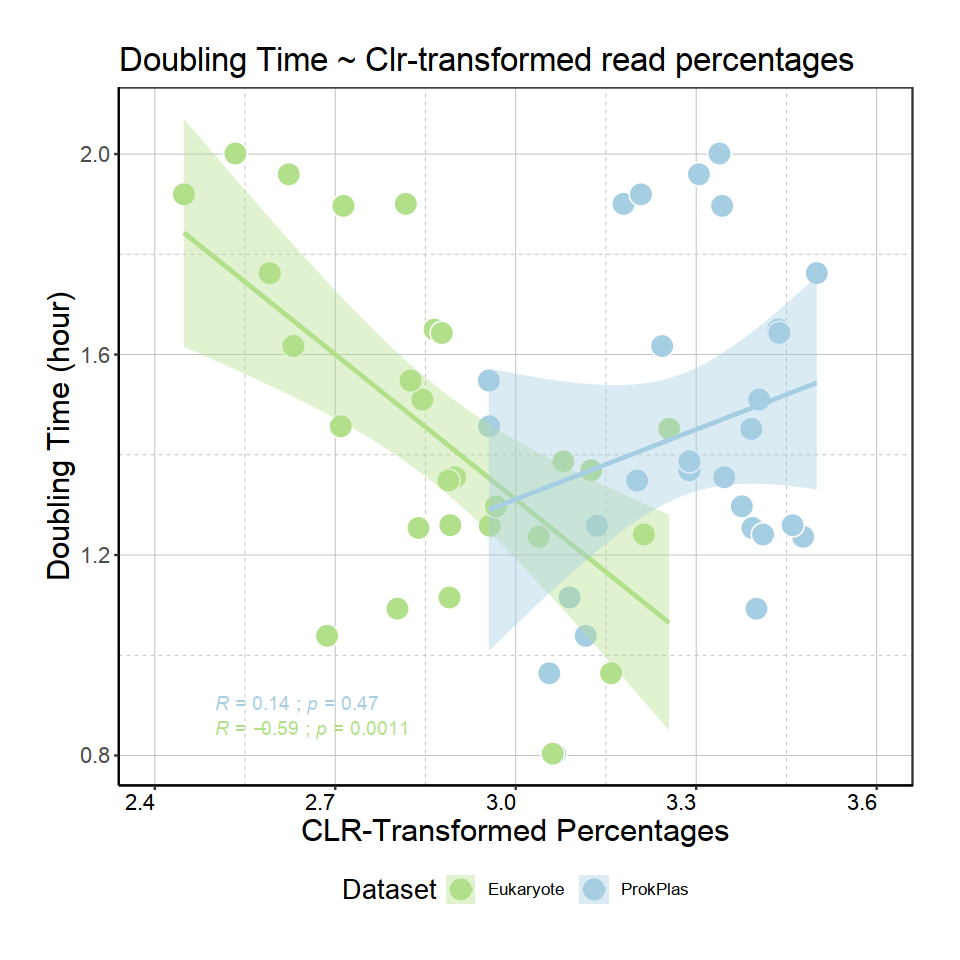

In [373]:
options(repr.plot.width=8, repr.plot.height=8)


read_pct_meta_df.mclr.growth <- data.frame(read_pct_meta_df.mclr) %>% 
    select(DoublingTime, ProkPlas, Eukaryote) %>% 
    #select(DoublingTime, Prokaryote, ProkaryoteVirus, Eukaryote, EukaryoteVirus, Plasmid) %>% 
    gather(ProkPlas:Eukaryote, key="Dataset", value="Percentage") %>%
    mutate(Dataset = factor(Dataset)) %>% 
    filter(DoublingTime >= 0.5)

head(read_pct_meta_df.mclr.growth, 2)

library(tidyverse)
library(ggpubr)
theme_set(theme_pubr())

ggscatter(read_pct_meta_df.mclr.growth, x = "Percentage", y = "DoublingTime", 
          xlab = "CLR-Transformed Percentages", ylab = "Doubling Time (hour)", 
          size = 6, shape = 21, color = "white", fill="Dataset",
          title = "Doubling Time ~ Clr-transformed read percentages",
          #palette = "jco",
          #palette = c('#B2DF8A', '#FB9A99', '#A6CEE3'), 
          palette = c('#B2DF8A', '#A6CEE3'), 
          #facet.by = "Dataset", 
          scales = "free_y",
          xlim = c(2.4, 3.6),
          add = "reg.line", 
          add.params = list(color = "Dataset", fill = "Dataset"), # Customize reg. line
          conf.int = TRUE # Add confidence interval
         ) +
  stat_cor(aes(color = Dataset), method = "spearman", label.x = 2.5, label.y = c(0.85, 0.9), label.sep = "; ") + my_theme1

ggsave(filename="ESPAE_kaiju_metaeuk_DEF_bwa_percentage_plot_2k_DoublingTime_clr.pdf", useDingbats=FALSE, 
       plot = last_plot(), path="./", 
       scale = 1, width = 200, height = 200, units = "mm",
       dpi = 300, limitsize = FALSE)

**- plot doublingtime without clr transformation**

,DoublingTime,Dataset,Percentage
,<dbl>,<fct>,<dbl>
1,0.8036018,ProkPlas,19.38786
2,1.2583083,ProkPlas,21.88668


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



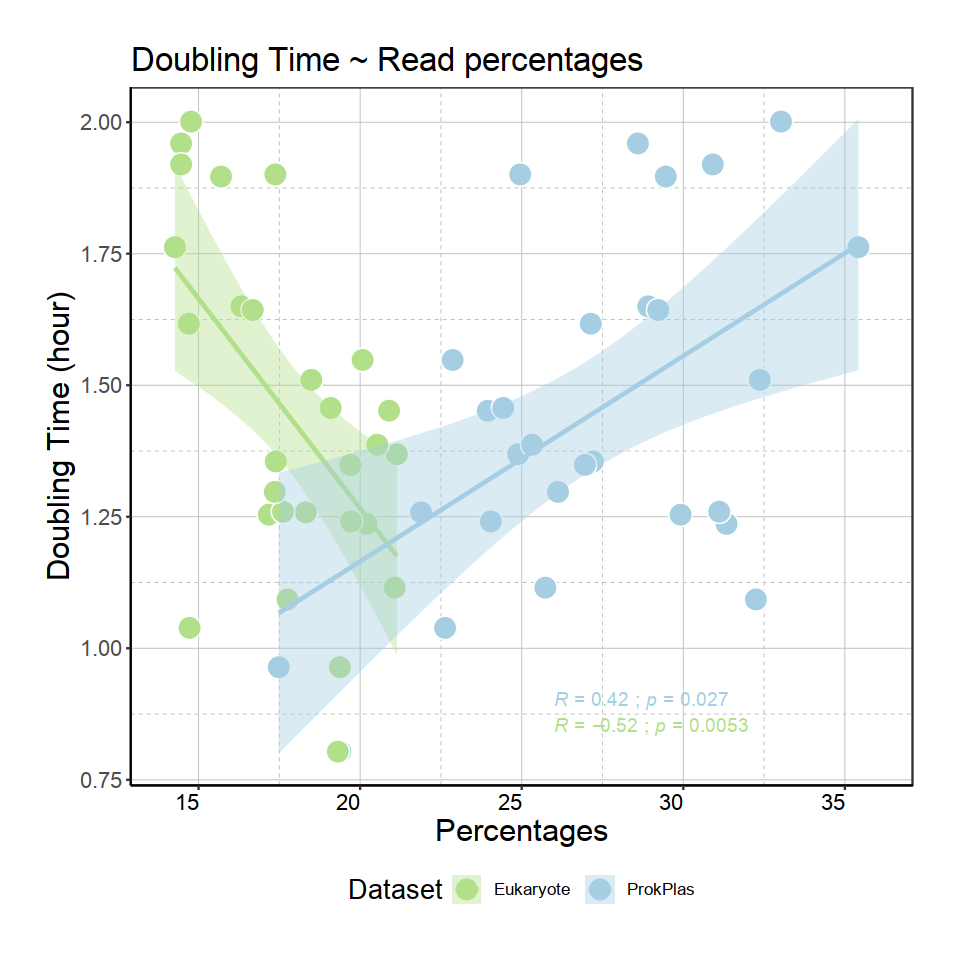

In [375]:
options(repr.plot.width=8, repr.plot.height=8)


read_pct_meta_df.growth <- data.frame(read_pct_meta_df) %>% 
    select(DoublingTime, ProkPlas, Eukaryote) %>% 
    #select(DoublingTime, Prokaryote, ProkaryoteVirus, Eukaryote, EukaryoteVirus, Plasmid) %>% 
    gather(ProkPlas:Eukaryote, key="Dataset", value="Percentage") %>%
    mutate(Dataset = factor(Dataset)) %>% 
    filter(DoublingTime >= 0.5)

head(read_pct_meta_df.growth, 2)

library(tidyverse)
library(ggpubr)
theme_set(theme_pubr())

ggscatter(read_pct_meta_df.growth, x = "Percentage", y = "DoublingTime",  
          xlab = "Percentages", ylab = "Doubling Time (hour)", 
          size = 6, shape = 21, color = "white", fill="Dataset",
          title = "Doubling Time ~ Read percentages",
          #palette = "jco",
          #palette = c('#B2DF8A', '#FB9A99', '#A6CEE3'), 
          palette = c('#B2DF8A', '#A6CEE3'), 
          #facet.by = "Dataset", 
          scales = "free_y",
          xlim = c(14, 36),
          add = "reg.line", 
          add.params = list(color = "Dataset", fill = "Dataset"), # Customize reg. line
          conf.int = TRUE # Add confidence interval
         ) +
  stat_cor(aes(color = Dataset), method = "spearman", label.x = 26, label.y = c(0.85, 0.9), label.sep = "; ") + my_theme1

ggsave(filename="ESPAE_kaiju_metaeuk_DEF_bwa_percentage_plot_2k_DoublingTime.pdf", useDingbats=FALSE, 
       plot = last_plot(), path="./", 
       scale = 1, width = 200, height = 200, units = "mm",
       dpi = 300, limitsize = FALSE)

**- plot growthrate with clr transformation**

,GrowthRate,Dataset,Percentage
,<dbl>,<fct>,<dbl>
1,20.70121,ProkPlas,3.065506
2,13.22055,ProkPlas,3.135024


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



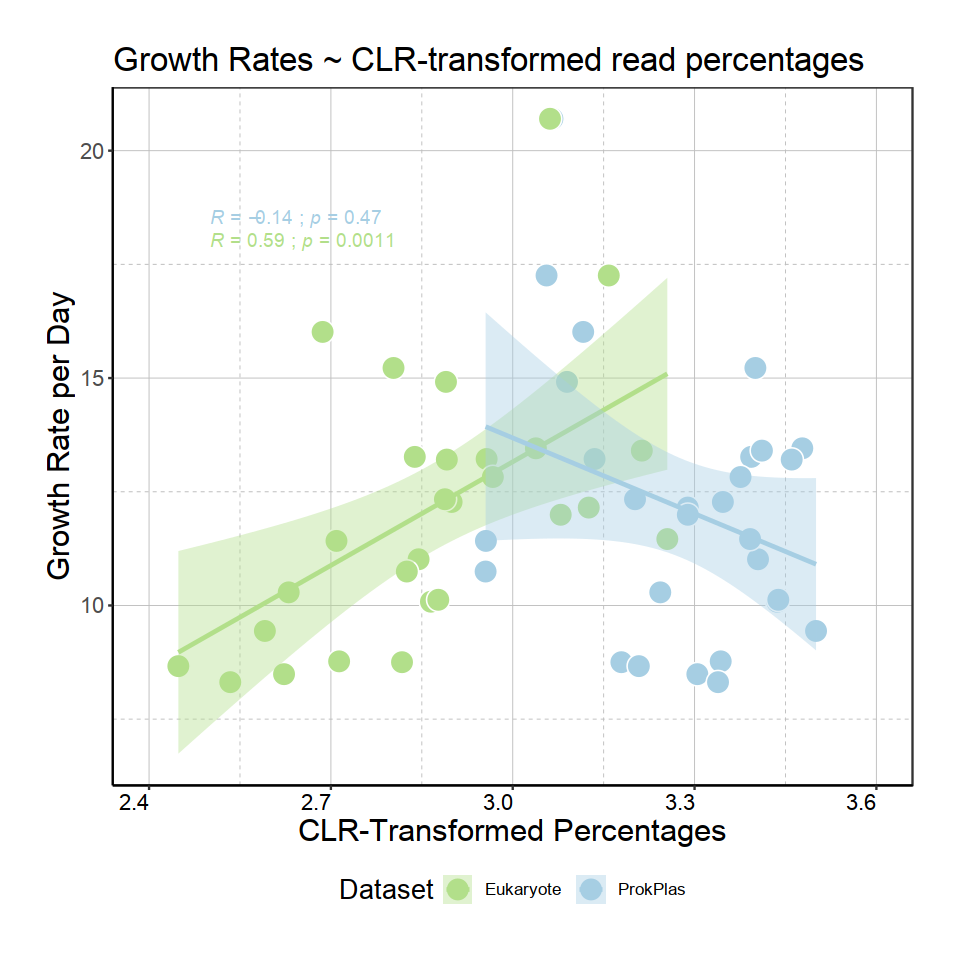

In [377]:
options(repr.plot.width=8, repr.plot.height=8)


read_pct_meta_df.mclr.growth <- data.frame(read_pct_meta_df.mclr) %>% 
    select(GrowthRate, ProkPlas, Eukaryote) %>% 
    #select(DoublingTime, Prokaryote, ProkaryoteVirus, Eukaryote, EukaryoteVirus, Plasmid) %>% 
    gather(ProkPlas:Eukaryote, key="Dataset", value="Percentage") %>%
    mutate(Dataset = factor(Dataset)) %>% 
    filter(GrowthRate <= 25) 

head(read_pct_meta_df.mclr.growth, 2)

library(tidyverse)
library(ggpubr)
theme_set(theme_pubr())

ggscatter(read_pct_meta_df.mclr.growth, x = "Percentage", y = "GrowthRate",  
          xlab = "CLR-Transformed Percentages", ylab = "Growth Rate per Day", 
          size = 6, shape = 21, color = "white", fill="Dataset",
          title = "Growth Rates ~ CLR-transformed read percentages",
          #palette = "jco",
          #palette = c('#B2DF8A', '#FB9A99', '#A6CEE3'), 
          palette = c('#B2DF8A', '#A6CEE3'), 
          #facet.by = "Dataset", 
          scales = "free_y",
          xlim = c(2.4, 3.6),
          add = "reg.line", 
          add.params = list(color = "Dataset", fill = "Dataset"), # Customize reg. line
          conf.int = TRUE # Add confidence interval
         ) +
  stat_cor(aes(color = Dataset), method = "spearman", label.x = 2.5, label.y = c(18, 18.5), label.sep = "; ") + my_theme1

ggsave(filename="ESPAE_kaiju_metaeuk_DEF_bwa_percentage_plot_2k_GrowthRate_clr.pdf", useDingbats=FALSE, 
       plot = last_plot(), path="./", 
       scale = 1, width = 200, height = 200, units = "mm",
       dpi = 300, limitsize = FALSE)

**- plot growthrate without clr transformation**

,GrowthRate,Dataset,Percentage
,<dbl>,<fct>,<dbl>
1,20.70121,ProkPlas,19.38786
2,13.22055,ProkPlas,21.88668


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



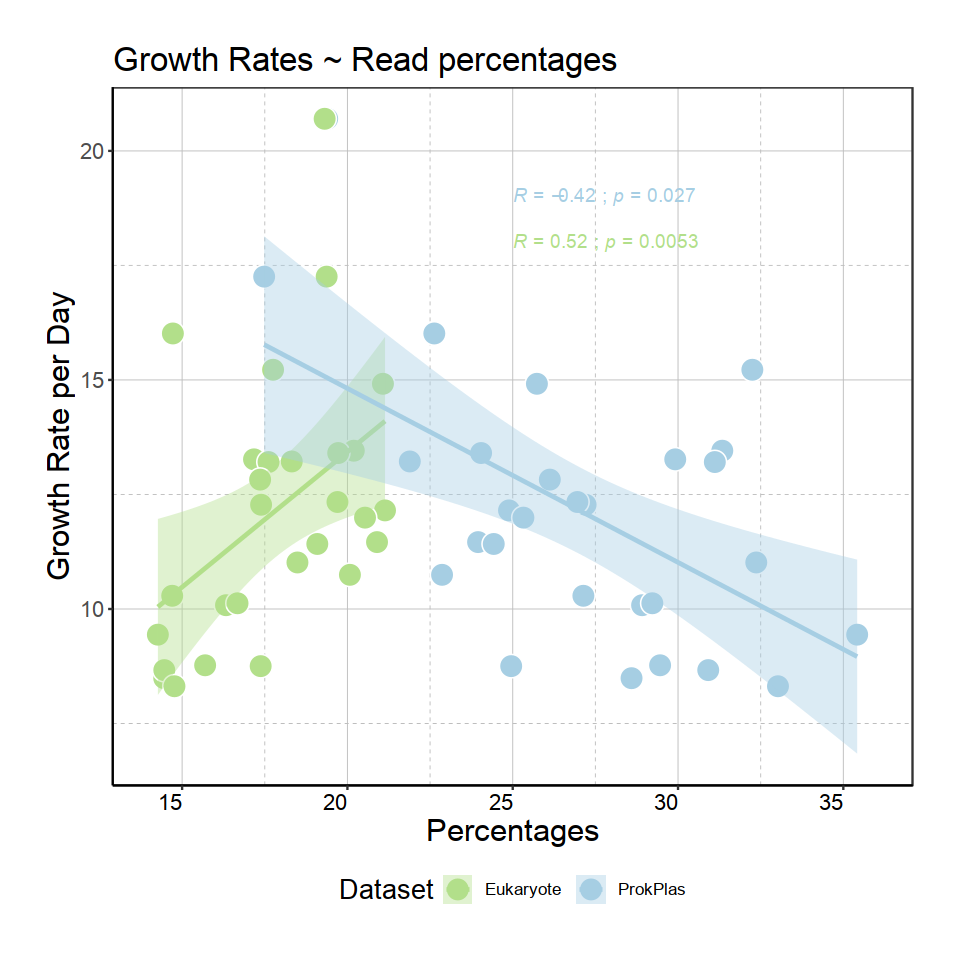

In [378]:
options(repr.plot.width=8, repr.plot.height=8)


read_pct_meta_df.growth <- data.frame(read_pct_meta_df) %>% 
    select(GrowthRate, ProkPlas, Eukaryote) %>% 
    #select(DoublingTime, Prokaryote, ProkaryoteVirus, Eukaryote, EukaryoteVirus, Plasmid) %>% 
    gather(ProkPlas:Eukaryote, key="Dataset", value="Percentage") %>%
    mutate(Dataset = factor(Dataset)) %>%
    filter(GrowthRate <= 25) 

head(read_pct_meta_df.growth, 2)

library(tidyverse)
library(ggpubr)
theme_set(theme_pubr())

ggscatter(read_pct_meta_df.growth, x = "Percentage", y = "GrowthRate",  
          xlab = "Percentages", ylab = "Growth Rate per Day", 
          size = 6, shape = 21, color = "white", fill="Dataset",
          title = "Growth Rates ~ Read percentages",
          #palette = "jco",
          #palette = c('#B2DF8A', '#FB9A99', '#A6CEE3'), 
          palette = c('#B2DF8A', '#A6CEE3'), 
          #facet.by = "Dataset", 
          scales = "free_y",
          xlim = c(14, 36),
          add = "reg.line", 
          add.params = list(color = "Dataset", fill = "Dataset"), # Customize reg. line
          conf.int = TRUE # Add confidence interval
         ) +
  stat_cor(aes(color = Dataset), method = "spearman", label.x = 25, label.y = c(18, 19), label.sep = "; ") + my_theme1

ggsave(filename="ESPAE_kaiju_metaeuk_DEF_bwa_percentage_plot_2k_GrowthRate.pdf", useDingbats=FALSE, 
       plot = last_plot(), path="./", 
       scale = 1, width = 200, height = 200, units = "mm",
       dpi = 300, limitsize = FALSE)

* Is the growth rate of sample Mar_20 an outlier? Let's test it using Grubbs test from the `outliers` package

In [381]:
# one growth rate observation is 37.25 
read_pct_meta_df[read_pct_meta_df$GrowthRate >=25, ]
metadata_df["ESPAEMG03_S39_L003", ]

,Eukaryote,EukaryoteVirus,ProkaryoteVirus,Month_Day,ProkPlas,DoublingTime,GrowthRate
,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
ESPAEMG03_S39_L003,19.16884,3.449916,4.786906,Mar_20,17.36369,0.4465829,37.25072


,Library_Type,Filter_Fraction,Month_Day,Month,Day,Time,Temperature,Depth,Salinity,Chlorophyll,Transmission,Total_Reads
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
ESPAEMG03_S39_L003,MG,AE,Mar_20,3,20,AM,16.283,4.689,33.448,0.54,94.6,94646542


In [407]:
library(outliers)
ol.test <- grubbs.test(read_pct_meta_df$GrowthRate)
ol.test


	Grubbs test for one outlier

data:  read_pct_meta_df$GrowthRate
G = 4.44250, U = 0.26997, p-value = 5.362e-08
alternative hypothesis: highest value 37.2507181955821 is an outlier


In [351]:
library(lme4)
growth.lm <- lm(data=read_pct_meta_df.mclr, GrowthRate ~ ProkPlas + ProkaryoteVirus + Eukaryote + EukaryoteVirus)
summary(growth.lm)


Call:
lm(formula = GrowthRate ~ ProkPlas + ProkaryoteVirus + Eukaryote + 
    EukaryoteVirus, data = read_pct_meta_df.mclr)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7923 -2.1290 -0.5433  1.6292 16.0390 

Coefficients: (1 not defined because of singularities)
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)       98.478     51.490   1.913  0.06733 . 
ProkPlas         -19.581      6.417  -3.051  0.00534 **
ProkaryoteVirus  -12.201      7.380  -1.653  0.11078   
Eukaryote          1.041      7.898   0.132  0.89622   
EukaryoteVirus        NA         NA      NA       NA   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.341 on 25 degrees of freedom
Multiple R-squared:  0.4353,	Adjusted R-squared:  0.3675 
F-statistic: 6.423 on 3 and 25 DF,  p-value: 0.002242


In [352]:
dtime.lm <- lm(data=read_pct_meta_df.mclr, DoublingTime ~ ProkPlas + ProkaryoteVirus + Eukaryote + EukaryoteVirus)
summary(dtime.lm)


Call:
lm(formula = DoublingTime ~ ProkPlas + ProkaryoteVirus + Eukaryote + 
    EukaryoteVirus, data = read_pct_meta_df.mclr)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.47656 -0.14424  0.03067  0.15073  0.56843 

Coefficients: (1 not defined because of singularities)
                Estimate Std. Error t value Pr(>|t|)  
(Intercept)      -0.4885     3.1121  -0.157   0.8765  
ProkPlas          0.9533     0.3879   2.458   0.0213 *
ProkaryoteVirus   0.4234     0.4461   0.949   0.3516  
Eukaryote        -0.7204     0.4774  -1.509   0.1438  
EukaryoteVirus        NA         NA      NA       NA  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2624 on 25 degrees of freedom
Multiple R-squared:  0.5312,	Adjusted R-squared:  0.4749 
F-statistic: 9.441 on 3 and 25 DF,  p-value: 0.0002386
